**First thing first, import libraries**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams['patch.force_edgecolor'] = True
import plotly.offline as po
import plotly.graph_objects as go
%matplotlib inline

print('Numpy version:',np.__version__)
print('Pandas version:', pd.__version__)
print('Seaborn version:', sns.__version__)

Numpy version: 1.20.3
Pandas version: 1.3.4
Seaborn version: 0.11.2


In [4]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 5
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# 1. DATA CLEANING

In [5]:
df = pd.read_excel('E Commerce Dataset.xlsx',sheet_name='E Comm')
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

In [6]:
df.shape

(5630, 20)

In [7]:
# Aggregate Churn Rate by Total Customer
df_churn_percentage = df.groupby('Churn').agg(Population=('Churn','count'))
df_churn_percentage.reset_index(inplace=True)

df_churn_percentage['%Churn'] = round(100*df_churn_percentage['Population']/df_churn_percentage['Population'].sum(),2)

df_churn_percentage

Churn  Population  %Churn
0      0        4682   83.16
1      1         948   16.84

In [8]:
# Visualize Total Customer Churn
plot_churn_labels = df['Churn'].value_counts().keys().tolist()
plot_churn_values = df['Churn'].value_counts().values.tolist()

plot_data_churn = [go.Pie(labels = plot_churn_labels,
                          values = plot_churn_values,
                          marker = dict(colors=['cornflowerblue', 'crimson'],
                                        line = dict(color='white',
                                                    width = 1.5)), 
                        rotation = 90,
                        hoverinfo = "label+value+text",
                        hole = 0.6)
                    ]
plot_layout = go.Layout(dict(title = "Customer Churn",
                             plot_bgcolor = "rgb(243,243,243)",
                             paper_bgcolor = "rgb(243,243,243)"))

fig = go.Figure(data=plot_data_churn, layout = plot_layout)
po.iplot(fig)

## a. Hadling Missing Values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [10]:
# Rename Column, make it simpler
df = df.rename(columns={'PreferredPaymentMode':'PayMethod',
                        'MaritalStatus':'Status',
                        'PreferredLoginDevice':'LoginDevice',
                        'PreferedOrderCat':'OrderCat',
                        'NumberOfDeviceRegistered':'DeviceRegistered',
                        'CashbackAmount':'Cashback',
                        'OrderAmountHikeFromlastYear':'%IncreaseOrderLY'})

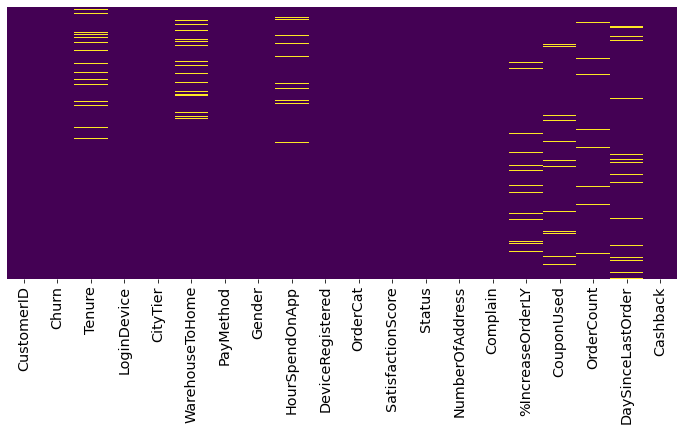

In [11]:
# Detect Null Values of Each Columns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')
plt.show()

In [12]:
df.isnull().sum()

CustomerID             0
Churn                  0
Tenure               264
LoginDevice            0
CityTier               0
WarehouseToHome      251
PayMethod              0
Gender                 0
HourSpendOnApp       255
DeviceRegistered       0
OrderCat               0
SatisfactionScore      0
Status                 0
NumberOfAddress        0
Complain               0
%IncreaseOrderLY     265
CouponUsed           256
OrderCount           258
DaySinceLastOrder    307
Cashback               0
dtype: int64

In [13]:
df.describe().transpose()

count          mean          std      min       25%  \
CustomerID         5630.0  52815.500000  1625.385339  50001.0  51408.25   
Churn              5630.0      0.168384     0.374240      0.0      0.00   
Tenure             5366.0     10.189899     8.557241      0.0      2.00   
CityTier           5630.0      1.654707     0.915389      1.0      1.00   
WarehouseToHome    5379.0     15.639896     8.531475      5.0      9.00   
HourSpendOnApp     5375.0      2.931535     0.721926      0.0      2.00   
DeviceRegistered   5630.0      3.688988     1.023999      1.0      3.00   
SatisfactionScore  5630.0      3.066785     1.380194      1.0      2.00   
NumberOfAddress    5630.0      4.214032     2.583586      1.0      2.00   
Complain           5630.0      0.284902     0.451408      0.0      0.00   
%IncreaseOrderLY   5365.0     15.707922     3.675485     11.0     13.00   
CouponUsed         5374.0      1.751023     1.894621      0.0      1.00   
OrderCount         5372.0      3.008004     2.939680      1.0      1.00   
DaySinceLastOrder  5323.0      4.543491     3.654433      0.0      2.00   
Cashback           5630.0    177.223030    49.207036      0.0    145.77   

                        50%         75%       max  
CustomerID         52815.50  54222.7500  55630.00  
Churn                  0.00      0.0000      1.00  
Tenure                 9.00     16.0000     61.00  
CityTier               1.00      3.0000      3.00  
WarehouseToHome       14.00     20.0000    127.00  
HourSpendOnApp         3.00      3.0000      5.00  
DeviceRegistered       4.00      4.0000      6.00  
SatisfactionScore      3.00      4.0000      5.00  
NumberOfAddress        3.00      6.0000     22.00  
Complain               0.00      1.0000      1.00  
%IncreaseOrderLY      15.00     18.0000     26.00  
CouponUsed             1.00      2.0000     16.00  
OrderCount             2.00      3.0000     16.00  
DaySinceLastOrder      3.00      7.0000     46.00  
Cashback             163.28    196.3925    324.99

In order to make the data more robust, values in the column that contains NULL: `Tenure`,`WarehouseToHome`,`HourSpendOnApp`,`%IncreaseOrderLY`,`CouponUsed`,`OrderCount`, and `DaySinceLastOrder` need to be replaced by median, since the distribution is positively skewed (median>mean)

In [14]:
# Fill Null Value - Imputation
df['Tenure'].fillna(df['Tenure'].median(),inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(),inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median(), inplace=True)
df['%IncreaseOrderLY'].fillna(df['%IncreaseOrderLY'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)

In [15]:
# Recheck Null Value
df.isnull().sum()

CustomerID           0
Churn                0
Tenure               0
LoginDevice          0
CityTier             0
WarehouseToHome      0
PayMethod            0
Gender               0
HourSpendOnApp       0
DeviceRegistered     0
OrderCat             0
SatisfactionScore    0
Status               0
NumberOfAddress      0
Complain             0
%IncreaseOrderLY     0
CouponUsed           0
OrderCount           0
DaySinceLastOrder    0
Cashback             0
dtype: int64

## b. Remove Duplicates (if any)

In [16]:
# Is there any duplicates?
df.duplicated().sum()

0

**Need check unusual/similar value in each column**

In [17]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'LoginDevice', 'CityTier',
       'WarehouseToHome', 'PayMethod', 'Gender', 'HourSpendOnApp',
       'DeviceRegistered', 'OrderCat', 'SatisfactionScore', 'Status',
       'NumberOfAddress', 'Complain', '%IncreaseOrderLY', 'CouponUsed',
       'OrderCount', 'DaySinceLastOrder', 'Cashback'],
      dtype='object')

In [18]:
df['CityTier'] = df['CityTier'].astype('object')

In [19]:
# Split data into numerical and categorical
nums = ['Churn','Tenure','DeviceRegistered','SatisfactionScore','Complain', 'DaySinceLastOrder','Cashback',
        'WarehouseToHome','NumberOfAddress','HourSpendOnApp','%IncreaseOrderLY','CouponUsed','OrderCount']
cats = ['LoginDevice','CityTier','PayMethod','Gender','OrderCat','Status']

In [20]:
df_halfclean =df.copy()

In [21]:
# Value Counting of Each Categorical type Column
for col in cats:
    print(f'Value count column {col}:')
    print(df_halfclean[col].value_counts())
    print('---'*10, '\n')

Value count column LoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: LoginDevice, dtype: int64
------------------------------ 

Value count column CityTier:
1    3666
3    1722
2     242
Name: CityTier, dtype: int64
------------------------------ 

Value count column PayMethod:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PayMethod, dtype: int64
------------------------------ 

Value count column Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64
------------------------------ 

Value count column OrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: OrderCat, dtype: int64
------------------------------ 

Value count column Status:
Married     2986
Single      1796
Divorced     848
Nam

Unusual/similar data is found in column</br> `LoginDevice` : Mobile Phone & Phone</br> `PayMethod` : CC & Credit Card, COD & Cash on delivery</br> `OrderCat` : Mobile Phone & Mobile

In [22]:
# Replace values in column
df_halfclean['PayMethod'].replace({'Credit Card':'CC', 'Cash on Delivery':'COD'},inplace=True)
df_halfclean['LoginDevice'].replace({'Mobile Phone':'Phone'},inplace=True)
df_halfclean['OrderCat'].replace({'Mobile Phone':'Phone','Mobile':'Phone'},inplace=True)

In [23]:
# Recheck is there duplicatd data after replacing similar/nusal values
print('Total duplicated data = ', df_halfclean.duplicated().sum())
print('Total row with duplicated data = ', df_halfclean.shape[0])
df_halfclean.drop_duplicates(inplace=True)
print('Total duplicated data = ', df_halfclean.duplicated().sum())
print('Total row with duplicated data = ', df_halfclean.shape[0])

Total duplicated data =  0
Total row with duplicated data =  5630
Total duplicated data =  0
Total row with duplicated data =  5630


In [24]:
# Recheck After Replacing Similar/Unusual Value
for col in cats:
    print(f'Value count column {col}:')
    print(df_halfclean[col].value_counts())
    print('---'*10, '\n')

Value count column LoginDevice:
Phone       3996
Computer    1634
Name: LoginDevice, dtype: int64
------------------------------ 

Value count column CityTier:
1    3666
3    1722
2     242
Name: CityTier, dtype: int64
------------------------------ 

Value count column PayMethod:
Debit Card    2314
CC            1774
E wallet       614
COD            514
UPI            414
Name: PayMethod, dtype: int64
------------------------------ 

Value count column Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64
------------------------------ 

Value count column OrderCat:
Phone                 2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: OrderCat, dtype: int64
------------------------------ 

Value count column Status:
Married     2986
Single      1796
Divorced     848
Name: Status, dtype: int64
------------------------------ 



## c. Handling Outliers

In [25]:
#nums1 tanpa kolom 'Churn'
nums1 = ['Tenure','DeviceRegistered','SatisfactionScore','DaySinceLastOrder','Cashback',
        'WarehouseToHome','NumberOfAddress','HourSpendOnApp','%IncreaseOrderLY','CouponUsed','OrderCount']

In [26]:
# Check Statistical Descriptive before handling outliers
df_halfclean[nums1].describe().transpose()

count        mean        std   min     25%     50%  \
Tenure             5630.0   10.134103   8.357951   0.0    3.00    9.00   
DeviceRegistered   5630.0    3.688988   1.023999   1.0    3.00    4.00   
SatisfactionScore  5630.0    3.066785   1.380194   1.0    2.00    3.00   
DaySinceLastOrder  5630.0    4.459325   3.570626   0.0    2.00    3.00   
Cashback           5630.0  177.223030  49.207036   0.0  145.77  163.28   
WarehouseToHome    5630.0   15.566785   8.345961   5.0    9.00   14.00   
NumberOfAddress    5630.0    4.214032   2.583586   1.0    2.00    3.00   
HourSpendOnApp     5630.0    2.934636   0.705528   0.0    2.00    3.00   
%IncreaseOrderLY   5630.0   15.674600   3.591058  11.0   13.00   15.00   
CouponUsed         5630.0    1.716874   1.857640   0.0    1.00    1.00   
OrderCount         5630.0    2.961812   2.879248   1.0    1.00    2.00   

                        75%     max  
Tenure              15.0000   61.00  
DeviceRegistered     4.0000    6.00  
SatisfactionScore    4.0000    5.00  
DaySinceLastOrder    7.0000   46.00  
Cashback           196.3925  324.99  
WarehouseToHome     20.0000  127.00  
NumberOfAddress      6.0000   22.00  
HourSpendOnApp       3.0000    5.00  
%IncreaseOrderLY    18.0000   26.00  
CouponUsed           2.0000   16.00  
OrderCount           3.0000   16.00

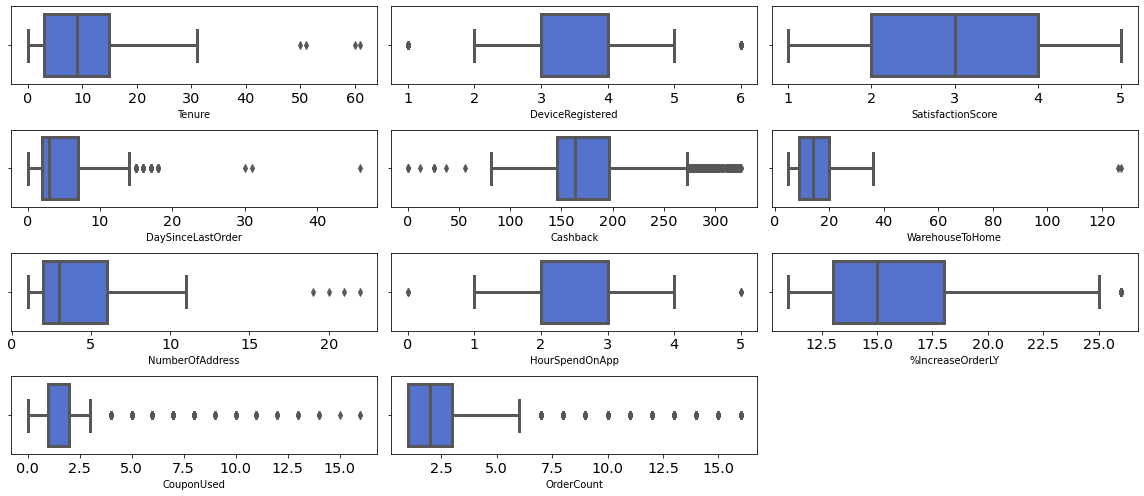

In [27]:
plt.figure(figsize=(16, 7))
for i in range(0, len(nums1)):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df_halfclean[nums1[i]], color='royalblue')
    plt.xlabel(nums1[i])
    plt.tight_layout()

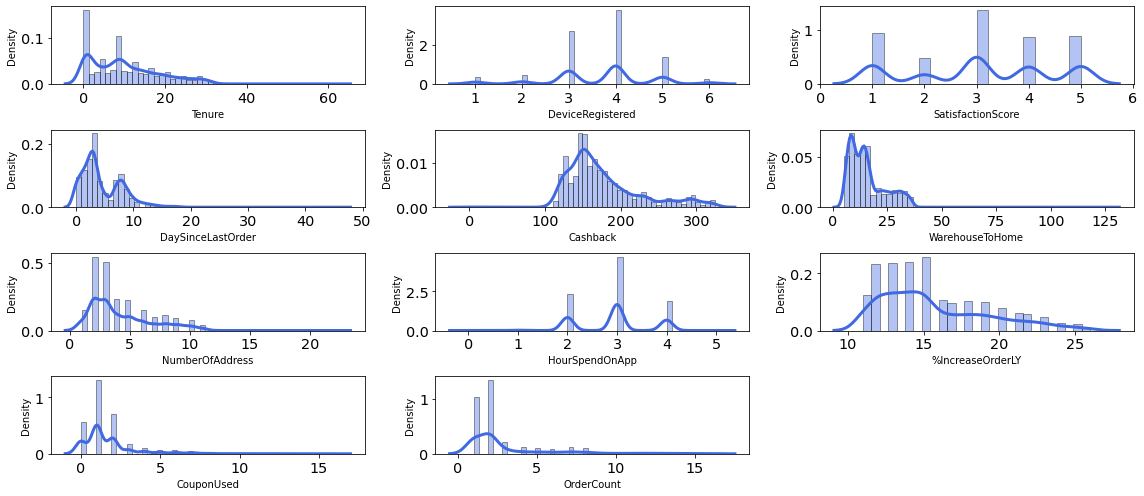

In [28]:
plt.figure(figsize=(16,7))
for i in range(0, len(nums1)):
    plt.subplot(4,3,i+1)
    sns.distplot(x=df_halfclean[nums1[i]], color='royalblue')
    plt.xlabel(nums1[i])
    plt.tight_layout()

In [29]:
df_clean = df_halfclean.copy()

In [30]:
# Remove Outliers
print(f'# Row before handling outliers: {len(df)}')

filtered_entries = np.array([True] * len(df_clean))
for col in df_clean[nums1].columns:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_clean[col] >= low_limit) & (df_clean[col] <= high_limit)) & filtered_entries
    
df_clean_IQR = df_clean[filtered_entries]

print(f'# Row after handling outliers: {len(df_clean_IQR)}')

# Row before handling outliers: 5630
# Row after handling outliers: 4048


In [31]:
# Check Statistical Descriptive after handling outliers
df_clean_IQR[nums1].describe().transpose()

count        mean        std   min       25%      50%  \
Tenure             4048.0    8.997036   7.853489   0.0    2.0000    8.000   
DeviceRegistered   4048.0    3.730731   0.802839   2.0    3.0000    4.000   
SatisfactionScore  4048.0    3.061265   1.374771   1.0    2.0000    3.000   
DaySinceLastOrder  4048.0    3.653409   2.930154   0.0    2.0000    3.000   
Cashback           4048.0  164.310581  33.776952  81.0  142.4675  155.675   
WarehouseToHome    4048.0   15.590662   7.961340   5.0    9.0000   14.000   
NumberOfAddress    4048.0    4.220109   2.561084   1.0    2.0000    3.000   
HourSpendOnApp     4048.0    2.933794   0.700922   1.0    2.0000    3.000   
%IncreaseOrderLY   4048.0   15.648962   3.523937  11.0   13.0000   15.000   
CouponUsed         4048.0    1.151186   0.825746   0.0    1.0000    1.000   
OrderCount         4048.0    1.892292   1.004935   1.0    1.0000    2.000   

                      75%     max  
Tenure              13.00   31.00  
DeviceRegistered     4.00    5.00  
SatisfactionScore    4.00    5.00  
DaySinceLastOrder    5.00   14.00  
Cashback           180.07  272.32  
WarehouseToHome     20.00   36.00  
NumberOfAddress      6.00   11.00  
HourSpendOnApp       3.00    4.00  
%IncreaseOrderLY    18.00   25.00  
CouponUsed           2.00    3.00  
OrderCount           2.00    6.00

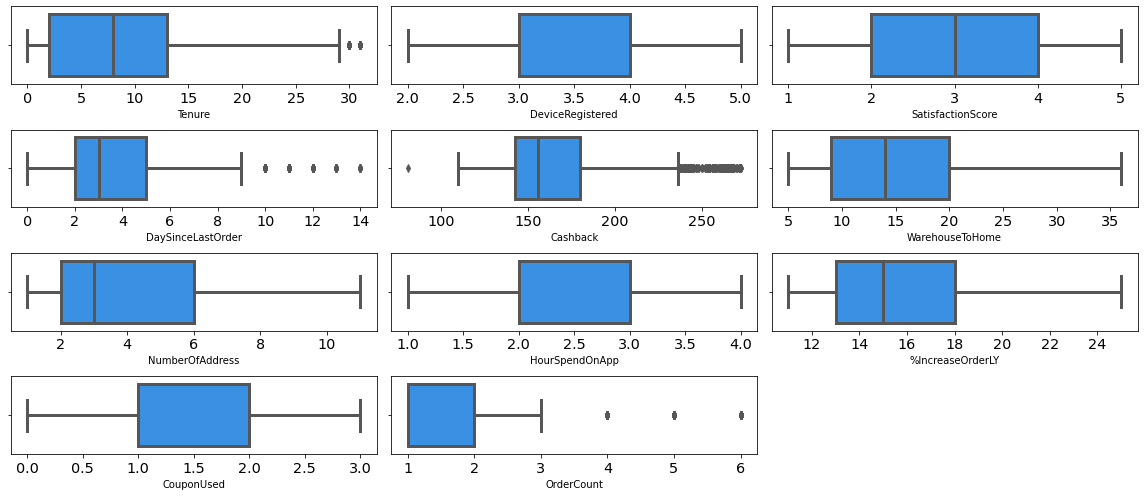

In [32]:
plt.figure(figsize=(16,7))
for i in range(0, len(nums1)):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df_clean_IQR[nums1[i]], color='dodgerblue')
    plt.xlabel(nums1[i])
    plt.tight_layout()

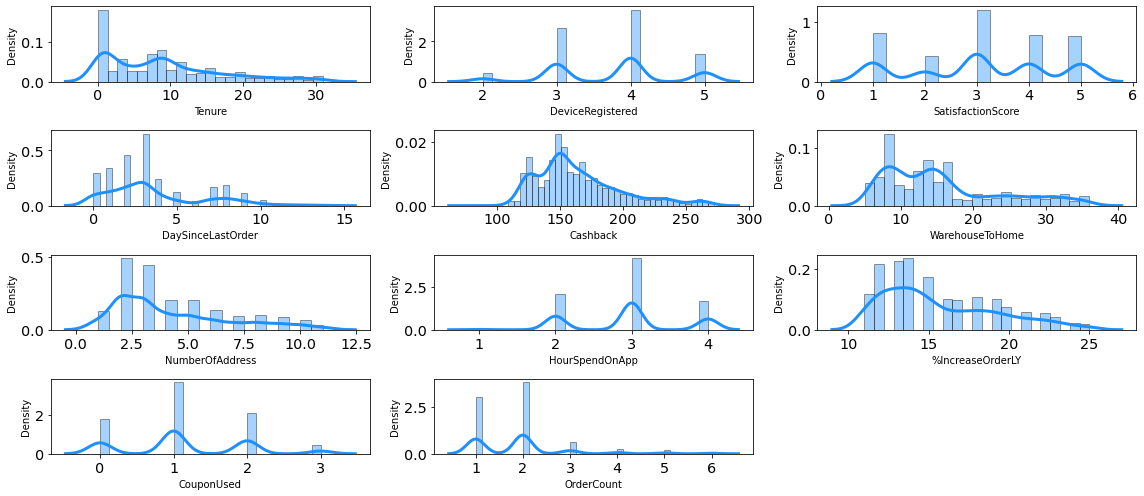

In [33]:
plt.figure(figsize=(16,7))
for i in range(0, len(nums1)):
    plt.subplot(4, 3, i+1)
    sns.distplot(x=df_clean_IQR[nums1[i]], color='dodgerblue')
    plt.xlabel(nums1[i])
    plt.tight_layout()

**The data is cleaned, check target (churn rate) before and after cleaning**

In [34]:
## Aggregate Churn Rate by Total Customer - after data cleaning
df_churn_percentageclean = df_clean_IQR.groupby('Churn').agg(Population=('Churn','count'))
df_churn_percentageclean.reset_index(inplace=True)

df_churn_percentageclean['%Churn'] = round(100*df_churn_percentageclean['Population']/df_churn_percentageclean['Population'].sum(),2)

# Compare Churn Rate before & after data cleaning
count_churn = df_churn_percentage['Population']
count_churn_clean = df_churn_percentageclean['Population']

percent_churn = df_churn_percentage['%Churn'][1]
percent_churnclean = df_churn_percentageclean['%Churn'][1]

print('Churn % before data cleaning :', percent_churn, "%", 'from total rows', len(df))
print(count_churn)
print('\n')

print('Churn % after data cleaning :', percent_churnclean, "%", 'from total rows', len(df_clean_IQR))
print(count_churn_clean)
print('\n')

Churn % before data cleaning : 16.84 % from total rows 5630
0    4682
1     948
Name: Population, dtype: int64


Churn % after data cleaning : 17.89 % from total rows 4048
0    3324
1     724
Name: Population, dtype: int64




In [35]:
# Visualize Total Customer Churn
plot_churn_labels1 = df_clean_IQR['Churn'].value_counts().keys().tolist()
plot_churn_values1 = df_clean_IQR['Churn'].value_counts().values.tolist()

plot_data_churn1 = [go.Pie(labels= plot_churn_labels1,
                          values = plot_churn_values1,
                          marker = dict(colors=['cornflowerblue', 'crimson'],
                                        line=dict(color='white',
                                                  width = 1.5)),
                          rotation = 90,
                          hoverinfo = "label+value+text",
                          hole = 0.6)
                   ]
plot_layout1 = go.Layout(dict(title="Customer Churn",
                             plot_bgcolor = "rgb(243,243,243)",
                             paper_bgcolor = "rgb(243,243,243)"))

fig = go.Figure(data=plot_data_churn1, layout=plot_layout1)
po.iplot(fig)

# 2. EXPLORATORY DATA ANALYSIS (EDA)

## a. Univariate Analysis 

**Data visualization of features vs target**

In [36]:
nums2 = ['Tenure','DeviceRegistered','SatisfactionScore','Complain','DaySinceLastOrder','Cashback',
        'CityTier','WarehouseToHome','NumberOfAddress','HourSpendOnApp','%IncreaseOrderLY','CouponUsed','OrderCount']

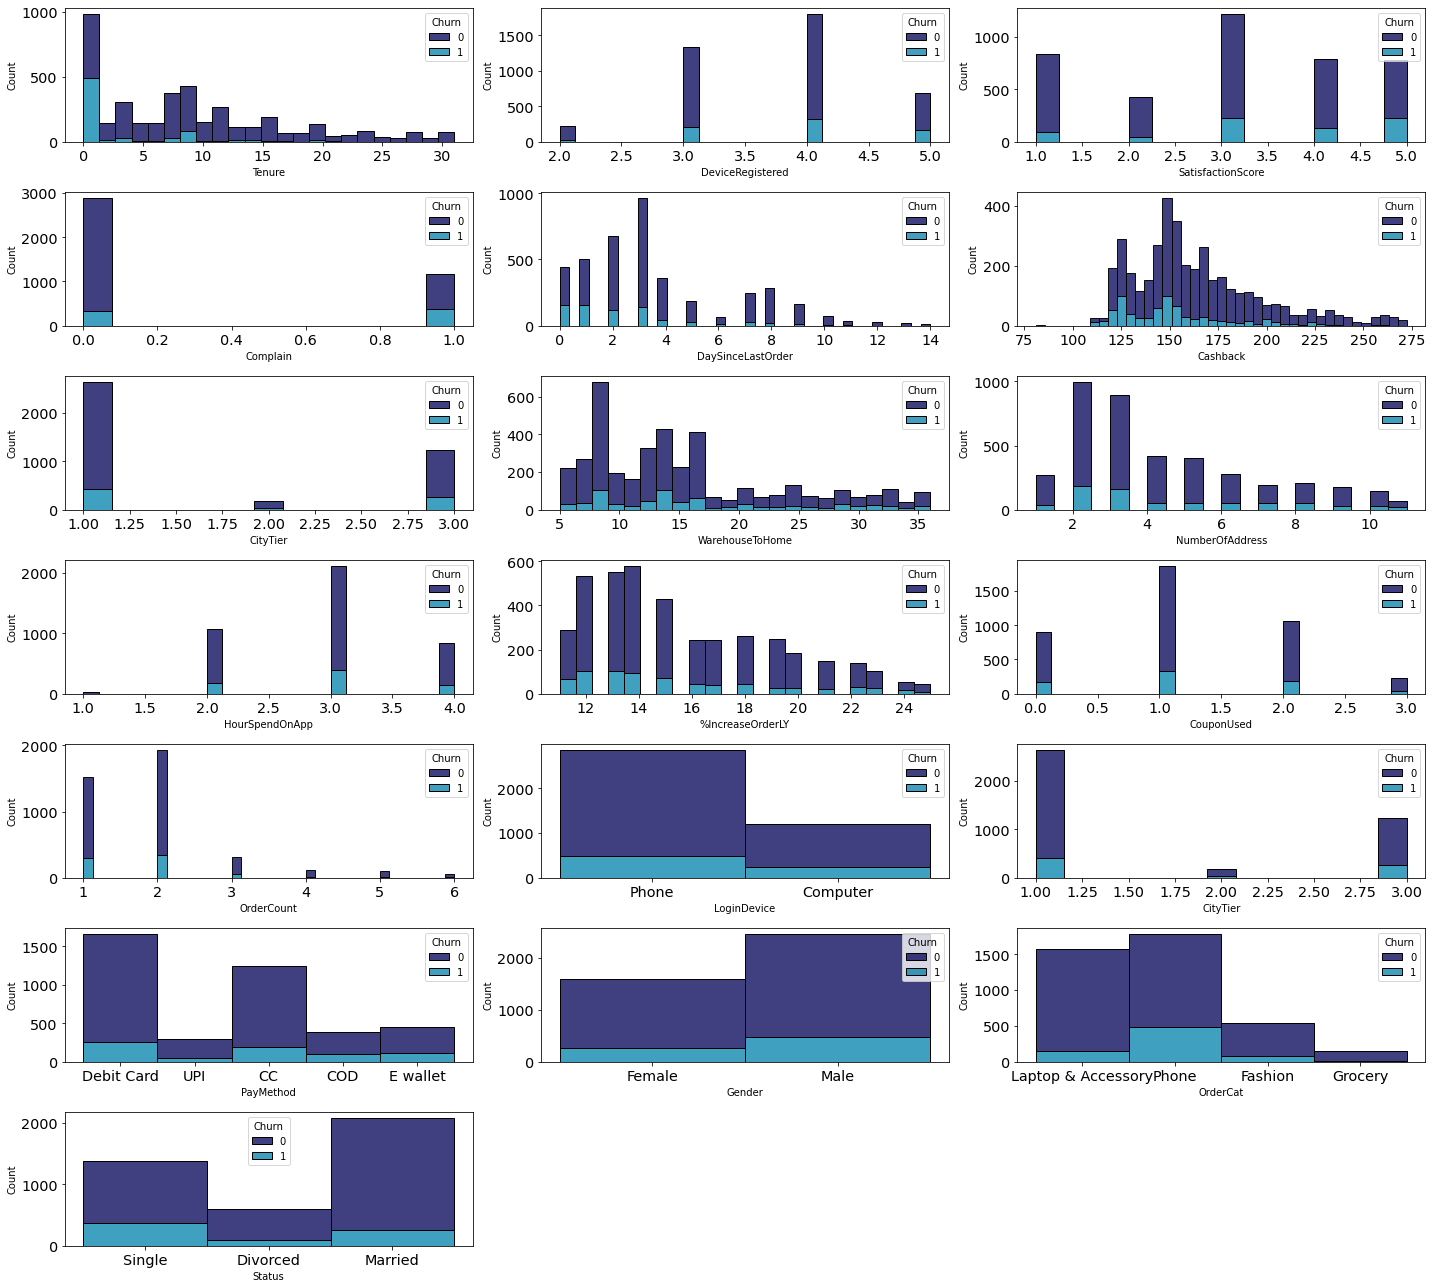

In [37]:
# All Columns vs Target
plt.figure(figsize=(20,18))
for i, col in enumerate(df_clean_IQR[nums2+cats].columns):
    plt.subplot(7,3,i+1)
    ax = sns.histplot(x=df_clean_IQR[col], hue=df_clean_IQR['Churn'], palette='ocean', multiple='stack')
    plt.tight_layout()

## b. Multivariate Analysis

**Heatmap correlation to figure out interaction between features**

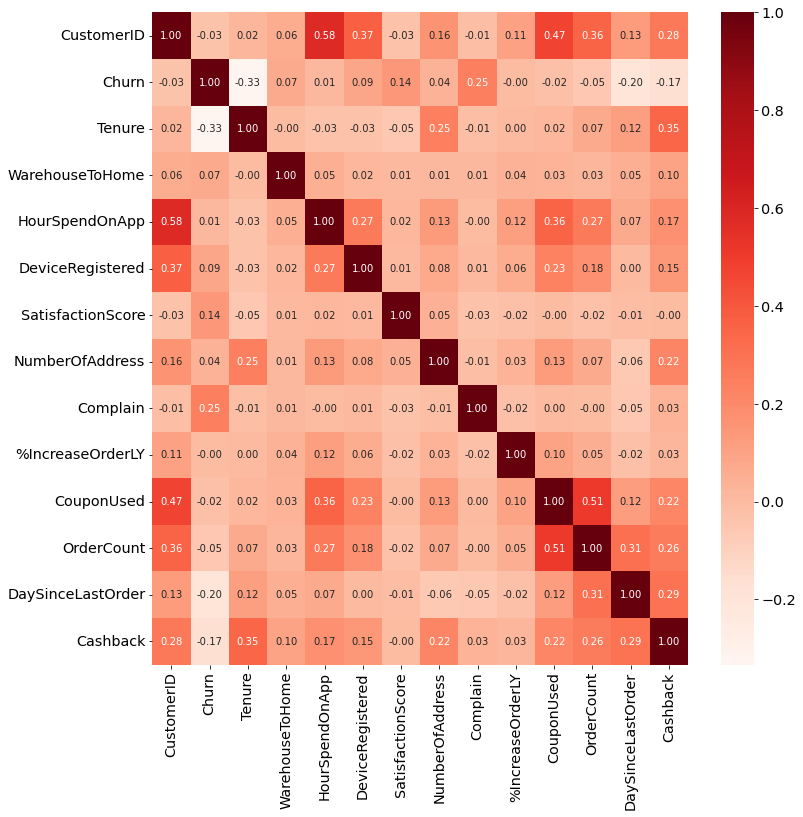

In [38]:
plt.figure(figsize=(12,12))
sns.heatmap(df_clean_IQR.corr(), annot=True, fmt='.2f', cmap='Reds')
plt.show()

**Analysis :**
- Target Variable : `Churn`
- Weak Correlation (0.1-0.4) :

1. `Churn` shows negatively low correlation to `Tenure`,`DaySinceLastOrder`, & `Cashback`
2. `Churn` shows positively low correlation to `Complain`, `DeviceRegistered`, & `SatisfactionScore`
3. `Tenure` shows positively low correlation to `NumberOfAddress`, `OrderCount`, & `DaySinceLastOrder`
4. `HourSpendOnApp` shows positively low correlation to `DeviceRegistered`, `%IncreaseOrderLY`, `OrderCount`, & `CouponUsed`
5. `CouponUsed` shows positively low correlation to `DaySinceLastOrder` & `Cashback`
6. `Tenure` shows positively low correlation to `Cashback`
7. `DaySinceLastOrder` shows positively low correlation to OrderCount

- Strong Correlation (0.5-0.7):
1. `CouponUsed` shows positively high correlation to `OrderCount` so one of the features must be dropped

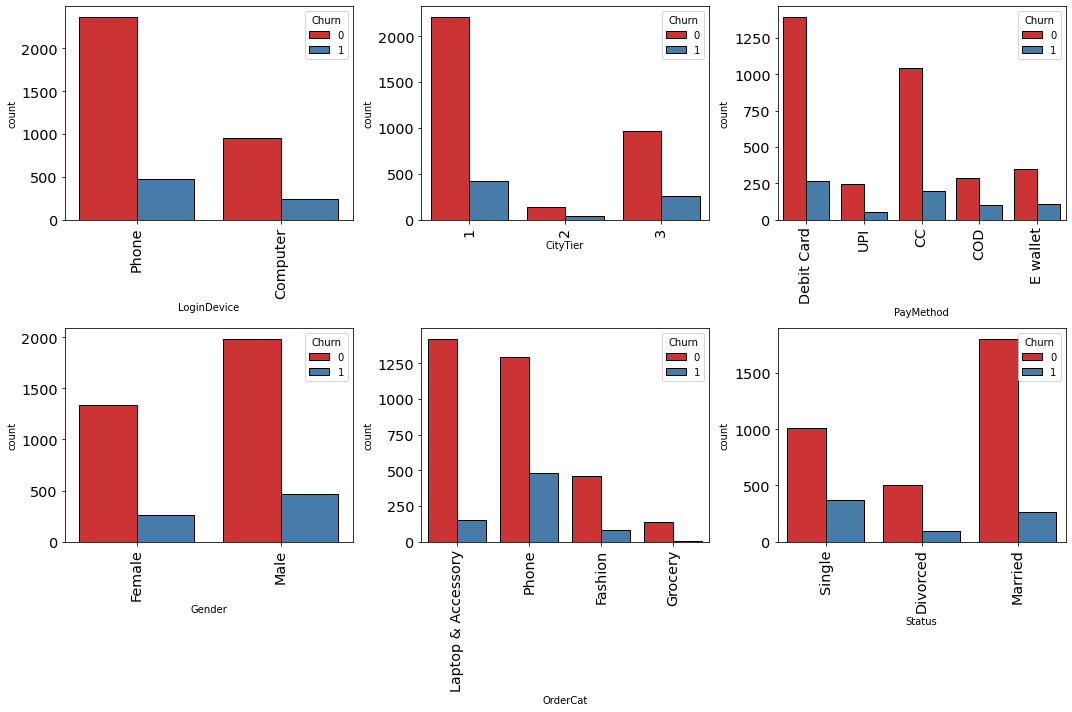

In [39]:
# Categorical Columns vs Target
features = cats
plt.figure(figsize=(15,10))
for i in range(0, len(features)):
    plt.subplot(2, 3, i+1)
    sns.countplot(data= df_clean_IQR, hue='Churn',x=features[i], palette='Set1')
    plt.xticks(rotation=90)
    plt.xlabel(features[i])
    plt.tight_layout()

**Analysis :**
- Male users dominate the `Gender` column of the dataset.
- The majority of customers in `Status` column is married.
- Based on `LoginDevice` & `Gender` columns, there is no significants distinction between each value.
- Customer with COD `PayMethod` is highly potential to churn.
- Customers whose `OrderCat` is Phone tend to churn higher than the others.

## c. Insight (Additional)

### - Churn Rate vs Complain

In [40]:
dfx = df_clean_IQR.copy()

In [41]:
dfx['Complain_s'] = np.where(dfx['Complain']>0,'Yes','No')
dfx['Churn_s'] = np.where(dfx['Churn']>0,'Yes','No')
dfx.sample(5)

CustomerID  Churn  Tenure LoginDevice CityTier  WarehouseToHome  \
3531       53532      0     1.0       Phone        1             31.0   
113        50114      0     5.0       Phone        3             10.0   
2895       52896      1     1.0       Phone        3             34.0   
4810       54811      0    17.0    Computer        1              7.0   
3956       53957      0    15.0       Phone        1             16.0   

       PayMethod  Gender  HourSpendOnApp  DeviceRegistered  ...    Status  \
3531          CC    Male             3.0                 4  ...    Single   
113   Debit Card  Female             2.0                 3  ...  Divorced   
2895    E wallet  Female             3.0                 4  ...  Divorced   
4810  Debit Card  Female             3.0                 4  ...   Married   
3956  Debit Card    Male             4.0                 4  ...   Married   

      NumberOfAddress Complain  %IncreaseOrderLY  CouponUsed  OrderCount  \
3531               10        0              23.0         2.0         2.0   
113                 3        0              11.0         1.0         1.0   
2895                3        0              23.0         2.0         2.0   
4810                6        0              14.0         2.0         3.0   
3956                3        0              21.0         2.0         2.0   

      DaySinceLastOrder  Cashback  Complain_s  Churn_s  
3531                3.0    160.97          No       No  
113                 2.0    139.31          No       No  
2895               10.0    201.39          No      Yes  
4810                3.0    180.62          No       No  
3956                5.0    147.89          No       No  

[5 rows x 22 columns]

In [42]:
dfx1 = dfx.groupby(['Complain_s','Churn_s']).agg({'CustomerID':'nunique'}).reset_index()
dfx1 = dfx1.rename(columns={'CustomerID':'UniqueCustomer'})
dfx1

Complain_s Churn_s  UniqueCustomer
0         No      No            2544
1         No     Yes             341
2        Yes      No             780
3        Yes     Yes             383

In [43]:
dfx2 = dfx.groupby(['Complain_s']).agg({'CustomerID':'nunique'}).reset_index()
dfx2 = dfx2.rename(columns={'CustomerID':'AllUniqueCustomer'})
dfx2

Complain_s  AllUniqueCustomer
0         No               2885
1        Yes               1163

In [44]:
dfx_grouped = dfx1.merge(dfx2,
                            left_on='Complain_s',
                            right_on='Complain_s',
                            how='inner')
dfx_grouped

Complain_s Churn_s  UniqueCustomer  AllUniqueCustomer
0         No      No            2544               2885
1         No     Yes             341               2885
2        Yes      No             780               1163
3        Yes     Yes             383               1163

In [45]:
dfx_grouped['PercentUniqueCustomer'] = round(100*dfx_grouped['UniqueCustomer']/(dfx_grouped['AllUniqueCustomer']),2)
dfx_grouped

Complain_s Churn_s  UniqueCustomer  AllUniqueCustomer  PercentUniqueCustomer
0         No      No            2544               2885                  88.18
1         No     Yes             341               2885                  11.82
2        Yes      No             780               1163                  67.07
3        Yes     Yes             383               1163                  32.93

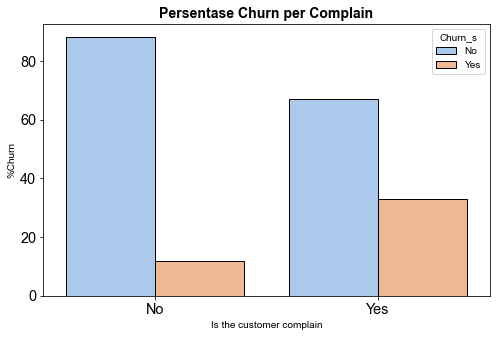

In [46]:
# Percent Churn Based On Complain
plt.figure(figsize=(8,5))
plt.title('Persentase Churn per Complain',fontsize=14,fontweight='bold')
ax = sns.barplot(x='Complain_s', y='PercentUniqueCustomer',
                 data = dfx_grouped,
                 palette = "pastel",
                 hue = 'Churn_s')
ax.set(xlabel='Is the customer complain',ylabel='%Churn')
ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
sns.set(style="darkgrid")
plt.show()

**Analysis :**</br>
It can be seen from the table customer who had a complain tend to churn 3 times higher rather than those who didn't have any complains.

## - Churn Rate vs Tenure

In [47]:
dfy = df_clean_IQR.copy()

In [48]:
dfy = dfy.groupby(['Tenure']).agg({'Churn':'sum'}).reset_index()
dfy['ChurnPercent'] = round(dfy['Churn']/df['Churn'].count()*100,2)

dfy.head()

Tenure  Churn  ChurnPercent
0     0.0    229          4.07
1     1.0    260          4.62
2     2.0     12          0.21
3     3.0     14          0.25
4     4.0     16          0.28

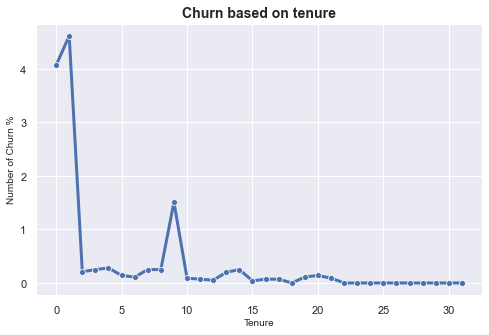

In [49]:
plt.figure(figsize=(8,5))
sns.lineplot(x='Tenure',y='ChurnPercent',data=dfy,lw=3,marker='o')

plt.title('Churn based on tenure', fontsize=14, fontweight='bold')

plt.ylabel('Number of Churn %', fontsize=10)
plt.xlabel('Tenure',fontsize=10);

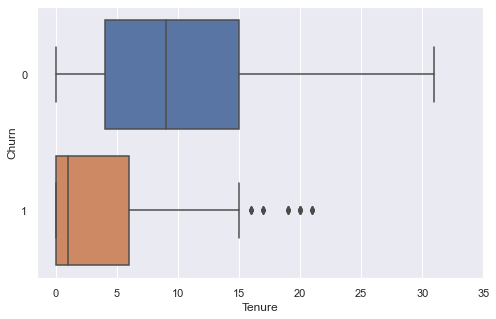

In [50]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Tenure',y='Churn',orient='h',data=df_clean_IQR)
plt.xticks(range(0,40,5))
plt.show()

**Analysis :**
1. The line graph describes a rise of churn rate when tenure in the range 0-1. Meanwhile, when the tenure is larger than 1 churn rate is significantly decreasing. 
2. Customer with tenure higher than 21 months indicates no churn.

## - Churn Rate vs Gender

In [51]:
dfz = df_clean_IQR.copy()

In [52]:
dfz1 = dfz.groupby(['Gender']).agg({'CustomerID':'nunique'}).reset_index()
dfz1 = dfz1.rename(columns={'CustomerID':'CustUniq'})
dfz1

Gender  CustUniq
0  Female      1593
1    Male      2455

In [53]:
dfz2 = dfz.groupby(['Gender','Churn']).agg({'CustomerID':'nunique'}).reset_index()
dfz2

Gender  Churn  CustomerID
0  Female      0        1336
1  Female      1         257
2    Male      0        1988
3    Male      1         467

In [54]:
dfz_grouped = dfz1.merge(dfz2, on='Gender')
dfz_grouped['PercentChurn'] = round(dfz_grouped['CustomerID']/dfz_grouped['CustUniq']*100,2)
dfz_grouped

Gender  CustUniq  Churn  CustomerID  PercentChurn
0  Female      1593      0        1336         83.87
1  Female      1593      1         257         16.13
2    Male      2455      0        1988         80.98
3    Male      2455      1         467         19.02

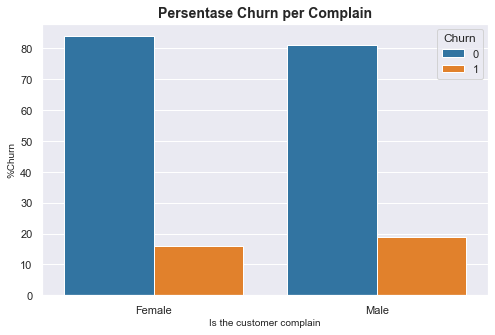

In [55]:
# Percent Churn Based On Gender
plt.figure(figsize=(8,5))
plt.title('Persentase Churn per Complain',fontsize=14,fontweight='bold')
ax = sns.barplot(x='Gender',y='PercentChurn',
                data=dfz_grouped,
                palette='tab10',
                hue='Churn')
ax.set(xlabel='Is the customer complain', ylabel='%Churn')
ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
sns.set(style='darkgrid')
plt.show()

**Analysis :**
1. It can be seen from the histogram that male customer is highly tend to churn, with a percentage of churn rate of 17%.
2. Meanwhile, the churn rate of female customer is 2% less than the male customer's.

## - Churn Rate vs Segmentasi Tenure

In [56]:
dfz = df_clean_IQR.copy()
dfz.sample(5)

CustomerID  Churn  Tenure LoginDevice CityTier  WarehouseToHome  \
202        50203      1     2.0       Phone        3              9.0   
3094       53095      0     2.0       Phone        1             24.0   
1368       51369      0     9.0       Phone        1             21.0   
2619       52620      0     4.0       Phone        3             35.0   
270        50271      0     9.0    Computer        1             27.0   

       PayMethod  Gender  HourSpendOnApp  DeviceRegistered  \
202           CC  Female             2.0                 3   
3094          CC    Male             4.0                 4   
1368  Debit Card    Male             3.0                 3   
2619    E wallet  Female             3.0                 4   
270           CC    Male             3.0                 3   

                OrderCat  SatisfactionScore    Status  NumberOfAddress  \
202   Laptop & Accessory                  3  Divorced                5   
3094  Laptop & Accessory                  5   Married                3   
1368               Phone                  1    Single                2   
2619  Laptop & Accessory                  1   Married                2   
270                Phone                  2  Divorced                8   

      Complain  %IncreaseOrderLY  CouponUsed  OrderCount  DaySinceLastOrder  \
202          1              18.0         1.0         1.0                0.0   
3094         0              13.0         1.0         2.0                9.0   
1368         0              14.0         1.0         1.0                0.0   
2619         0              14.0         0.0         5.0                7.0   
270          0              20.0         0.0         1.0                2.0   

      Cashback  
202     152.38  
3094    170.58  
1368    112.32  
2619    154.68  
270     122.58

In [57]:
dfz['TenureSegmentation'] = np.where(dfz['Tenure']>10, 'high', np.where(dfz['Tenure']<3,'low','mid'))
dfz.sample(5)

CustomerID  Churn  Tenure LoginDevice CityTier  WarehouseToHome  \
1142       51143      0     7.0    Computer        3             16.0   
3851       53852      0    12.0       Phone        1              9.0   
687        50688      0    16.0    Computer        1             33.0   
5135       55136      1    19.0       Phone        3             20.0   
3488       53489      1     1.0       Phone        1             32.0   

       PayMethod  Gender  HourSpendOnApp  DeviceRegistered  ...  \
1142  Debit Card    Male             2.0                 3  ...   
3851          CC  Female             3.0                 5  ...   
687   Debit Card  Female             2.0                 3  ...   
5135    E wallet    Male             3.0                 2  ...   
3488          CC    Male             3.0                 5  ...   

     SatisfactionScore    Status NumberOfAddress  Complain  %IncreaseOrderLY  \
1142                 3   Married               2         1              14.0   
3851                 3   Married               5         1              20.0   
687                  5  Divorced               9         0              11.0   
5135                 3    Single               8         1              18.0   
3488                 4    Single               6         1              21.0   

      CouponUsed  OrderCount  DaySinceLastOrder  Cashback  TenureSegmentation  
1142         1.0         1.0                7.0    140.01                 mid  
3851         2.0         2.0                3.0    202.56                high  
687          0.0         1.0                1.0    208.20                high  
5135         1.0         4.0                9.0    261.95                high  
3488         1.0         3.0                3.0    148.13                 low  

[5 rows x 21 columns]

In [58]:
dfzg = dfz.groupby(['TenureSegmentation','Churn']).agg({'CustomerID':'nunique'}).reset_index().rename(columns={'CustomerID':'Total'})
dfzg

TenureSegmentation  Churn  Total
0               high      0   1305
1               high      1     61
2                low      0    627
3                low      1    501
4                mid      0   1392
5                mid      1    162

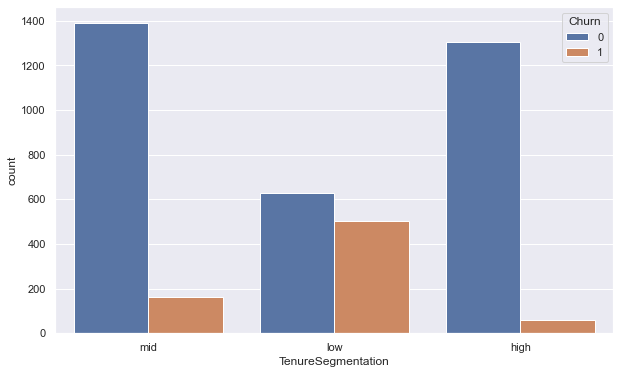

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(x='TenureSegmentation',hue='Churn',data=dfz)
plt.show()

# 3. DATA PREPARATION

## a. Feature Engineering (Baru)

In [60]:
dfclean = df_clean_IQR.copy()

In [61]:
# Drop CustomerID
dfclean.drop(columns='CustomerID',inplace=True)

In [62]:
dfclean.columns

Index(['Churn', 'Tenure', 'LoginDevice', 'CityTier', 'WarehouseToHome',
       'PayMethod', 'Gender', 'HourSpendOnApp', 'DeviceRegistered', 'OrderCat',
       'SatisfactionScore', 'Status', 'NumberOfAddress', 'Complain',
       '%IncreaseOrderLY', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder',
       'Cashback'],
      dtype='object')

In [63]:
cats3=['CityTier','LoginDevice', 'PayMethod', 'Gender', 'OrderCat', 'Status']
nums3=['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
       'DeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 
       '%IncreaseOrderLY', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'Cashback']

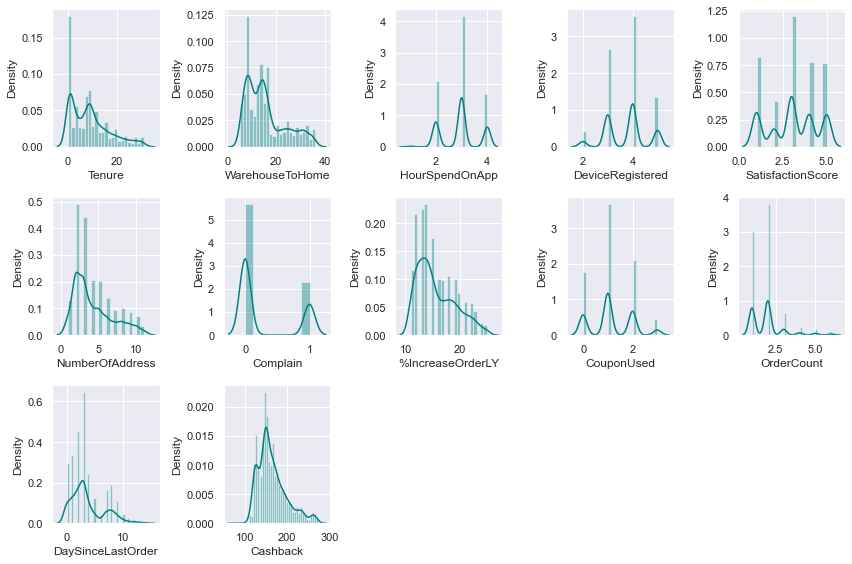

In [64]:
plt.figure(figsize=(12,8))
for i in range(0, len(nums3)):
    sns.set_style('darkgrid')
    plt.subplot(3,5,i+1)
    sns.distplot(x=dfclean[nums3[i]],color='teal')
    plt.xlabel(nums3[i])
    plt.tight_layout()

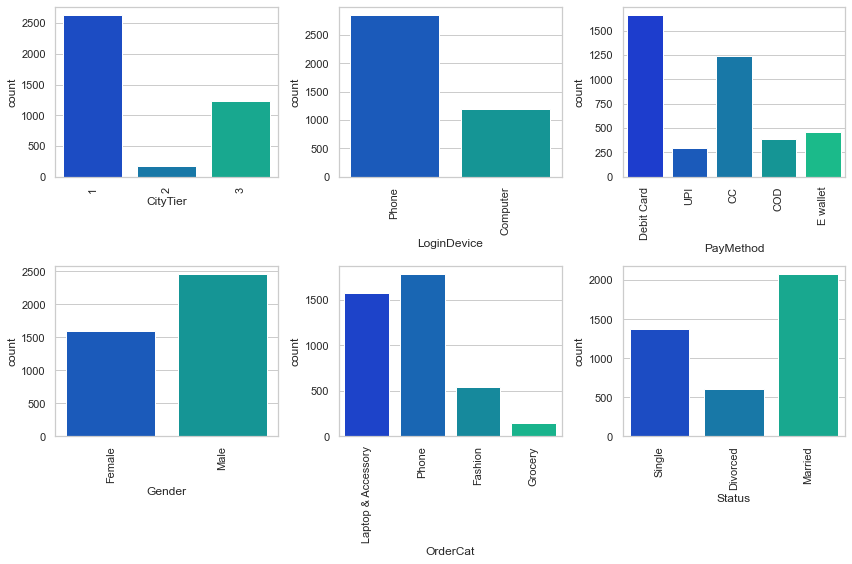

In [65]:
plt.figure(figsize=(12,8))
for i in range(0, len(cats3)):
    sns.set_style('whitegrid')
    plt.subplot(2,3,i+1)
    sns.countplot(x=dfclean[cats3[i]], palette='winter',orient='v')
    plt.xticks(rotation=90)
    plt.tight_layout()

## Transform categorical feature `PayMethod` & `OrderCat` into three distinct values

In [66]:
# Replace values in column
dfclean['PayMethod'].replace({'UPI':'Others','E wallet':'Others'},inplace=True)
dfclean['OrderCat'].replace({'Fashion':'Others','Grocery':'Others'},inplace=True)

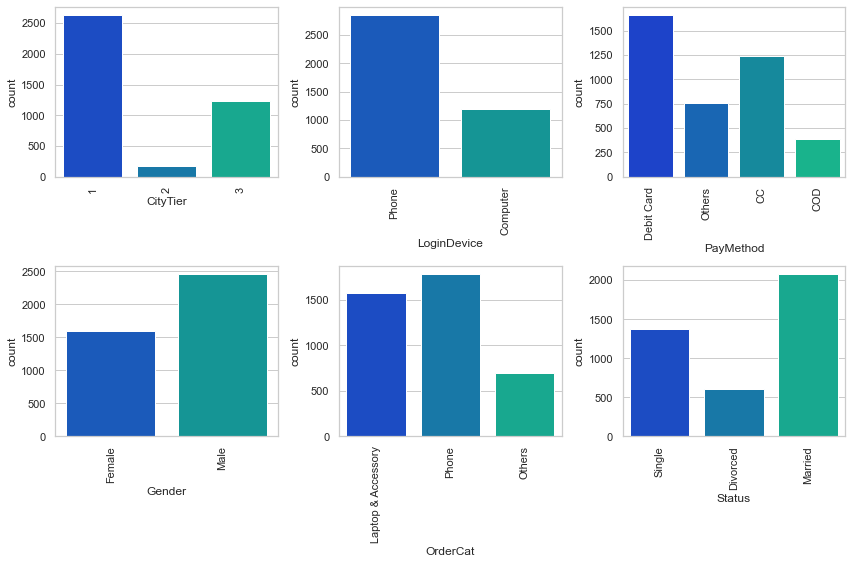

In [67]:
# Recheck Categorical Features after transformation
plt.figure(figsize=(12,8))
for i in range(0, len(cats3)):
    sns.set_style('whitegrid')
    plt.subplot(2,3,i+1)
    sns.countplot(x=dfclean[cats3[i]], palette='winter',orient='v')
    plt.xticks(rotation=90)
    plt.tight_layout()

## Segmenting feature `Tenure` split into specific range of period

In [68]:
dfclean[['Tenure']].describe().transpose()

count      mean       std  min  25%  50%   75%   max
Tenure  4048.0  8.997036  7.853489  0.0  2.0  8.0  13.0  31.0

In [69]:
dfclean['TenureSegmentation'] = np.where(dfclean['Tenure']>=13,'high',np.where(dfclean['Tenure']<=2,'low','mid'))

In [70]:
dfclean.sample(5)

Churn  Tenure LoginDevice CityTier  WarehouseToHome   PayMethod  Gender  \
1376      0    17.0       Phone        1             16.0      Others    Male   
153       0     0.0    Computer        1              6.0  Debit Card  Female   
3259      0    10.0    Computer        3             15.0  Debit Card    Male   
3778      0    16.0       Phone        1              9.0          CC    Male   
2593      0     0.0       Phone        1             14.0          CC  Female   

      HourSpendOnApp  DeviceRegistered            OrderCat  SatisfactionScore  \
1376             2.0                 3  Laptop & Accessory                  1   
153              2.0                 3  Laptop & Accessory                  4   
3259             4.0                 5              Others                  5   
3778             4.0                 5               Phone                  4   
2593             3.0                 3               Phone                  1   

       Status  NumberOfAddress  Complain  %IncreaseOrderLY  CouponUsed  \
1376  Married                3         1              13.0         0.0   
153   Married                2         0              20.0         0.0   
3259   Single                3         0              16.0         1.0   
3778  Married                6         0              15.0         2.0   
2593   Single                2         0              11.0         0.0   

      OrderCount  DaySinceLastOrder  Cashback TenureSegmentation  
1376         1.0                3.0    164.65               high  
153          1.0                4.0    163.97                low  
3259         2.0               10.0    200.87                mid  
3778         2.0                1.0    173.41               high  
2593         1.0                4.0    134.45                low

## b. Feature Encoding

One Hot Encoding : `LoginDevice`, `PayMethod`, `PreferedOrderCat`, `Status`, `CityTier`, `TenureSegmentation`</br>
Label Encoding : `Gender`

**One Hot Encoding :**

In [71]:
df_encode = dfclean.copy()

In [72]:
cats_select = ['LoginDevice','PayMethod','OrderCat','Status','CityTier','TenureSegmentation']

In [73]:
for cat in cats_select:
    onehots = pd.get_dummies(df_encode[cat], prefix=cat)
    df_encode = df_encode.join(onehots)

In [74]:
df_encode.columns

Index(['Churn', 'Tenure', 'LoginDevice', 'CityTier', 'WarehouseToHome',
       'PayMethod', 'Gender', 'HourSpendOnApp', 'DeviceRegistered', 'OrderCat',
       'SatisfactionScore', 'Status', 'NumberOfAddress', 'Complain',
       '%IncreaseOrderLY', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder',
       'Cashback', 'TenureSegmentation', 'LoginDevice_Computer',
       'LoginDevice_Phone', 'PayMethod_CC', 'PayMethod_COD',
       'PayMethod_Debit Card', 'PayMethod_Others',
       'OrderCat_Laptop & Accessory', 'OrderCat_Others', 'OrderCat_Phone',
       'Status_Divorced', 'Status_Married', 'Status_Single', 'CityTier_1',
       'CityTier_2', 'CityTier_3', 'TenureSegmentation_high',
       'TenureSegmentation_low', 'TenureSegmentation_mid'],
      dtype='object')

**Drop the outdated columns**

In [75]:
df_encode = df_encode.drop(columns=['LoginDevice','PayMethod','OrderCat','Status','CityTier','TenureSegmentation'])

In [76]:
df_encode.shape

(4048, 32)

In [77]:
df_encode.head()

Churn  Tenure  WarehouseToHome  Gender  HourSpendOnApp  DeviceRegistered  \
0      1     4.0              6.0  Female             3.0                 3   
1      1     9.0              8.0    Male             3.0                 4   
2      1     9.0             30.0    Male             2.0                 4   
3      1     0.0             15.0    Male             2.0                 4   
4      1     0.0             12.0    Male             3.0                 3   

   SatisfactionScore  NumberOfAddress  Complain  %IncreaseOrderLY  ...  \
0                  2                9         1              11.0  ...   
1                  3                7         1              15.0  ...   
2                  3                6         1              14.0  ...   
3                  5                8         0              23.0  ...   
4                  5                3         0              11.0  ...   

   OrderCat_Phone  Status_Divorced  Status_Married  Status_Single  CityTier_1  \
0               0                0               0              1           0   
1               1                0               0              1           1   
2               1                0               0              1           1   
3               0                0               0              1           0   
4               1                0               0              1           1   

   CityTier_2  CityTier_3  TenureSegmentation_high  TenureSegmentation_low  \
0           0           1                        0                       0   
1           0           0                        0                       0   
2           0           0                        0                       0   
3           0           1                        0                       1   
4           0           0                        0                       1   

   TenureSegmentation_mid  
0                       1  
1                       1  
2                       1  
3                       0  
4                       0  

[5 rows x 32 columns]

**Label Encoding :**

In [78]:
mapping_gender = {'Male':1, 'Female':0}
df_encode['Gender'] = df_encode['Gender'].map(mapping_gender)

In [79]:
df_encode.head()

Churn  Tenure  WarehouseToHome  Gender  HourSpendOnApp  DeviceRegistered  \
0      1     4.0              6.0       0             3.0                 3   
1      1     9.0              8.0       1             3.0                 4   
2      1     9.0             30.0       1             2.0                 4   
3      1     0.0             15.0       1             2.0                 4   
4      1     0.0             12.0       1             3.0                 3   

   SatisfactionScore  NumberOfAddress  Complain  %IncreaseOrderLY  ...  \
0                  2                9         1              11.0  ...   
1                  3                7         1              15.0  ...   
2                  3                6         1              14.0  ...   
3                  5                8         0              23.0  ...   
4                  5                3         0              11.0  ...   

   OrderCat_Phone  Status_Divorced  Status_Married  Status_Single  CityTier_1  \
0               0                0               0              1           0   
1               1                0               0              1           1   
2               1                0               0              1           1   
3               0                0               0              1           0   
4               1                0               0              1           1   

   CityTier_2  CityTier_3  TenureSegmentation_high  TenureSegmentation_low  \
0           0           1                        0                       0   
1           0           0                        0                       0   
2           0           0                        0                       0   
3           0           1                        0                       1   
4           0           0                        0                       1   

   TenureSegmentation_mid  
0                       1  
1                       1  
2                       1  
3                       0  
4                       0  

[5 rows x 32 columns]

**Split data into train and test**

In [80]:
# Split features vs target
X = df_encode[[col for col in df_encode.columns if (str(df_encode[col].dtype) != 'object') and col not in ['Churn']]]
y = df_encode['Churn'].values
print(X.shape)
print(y.shape)

(4048, 31)
(4048,)


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
print('Total rows & column of train set: ', X_train.shape)
print('Total rows & column of test set: ', X_test.shape)

Total rows & column of train set:  (2833, 31)
Total rows & column of test set:  (1215, 31)


In [83]:
X_train.head()

Tenure  WarehouseToHome  Gender  HourSpendOnApp  DeviceRegistered  \
5179    10.0             23.0       0             4.0                 5   
5379     3.0             16.0       0             3.0                 4   
5435    25.0             10.0       0             3.0                 4   
3922     9.0             34.0       1             3.0                 4   
283     25.0             10.0       0             1.0                 3   

      SatisfactionScore  NumberOfAddress  Complain  %IncreaseOrderLY  \
5179                  5                6         0              14.0   
5379                  3               11         0              18.0   
5435                  3                4         0              12.0   
3922                  3                4         0              17.0   
283                   2                3         0              13.0   

      CouponUsed  ...  OrderCat_Phone  Status_Divorced  Status_Married  \
5179         2.0  ...               0                0               1   
5379         1.0  ...               1                0               1   
5435         3.0  ...               0                0               1   
3922         1.0  ...               0                0               1   
283          1.0  ...               0                1               0   

      Status_Single  CityTier_1  CityTier_2  CityTier_3  \
5179              0           0           0           1   
5379              0           1           0           0   
5435              0           1           0           0   
3922              0           1           0           0   
283               0           1           0           0   

      TenureSegmentation_high  TenureSegmentation_low  TenureSegmentation_mid  
5179                        0                       0                       1  
5379                        0                       0                       1  
5435                        1                       0                       0  
3922                        0                       0                       1  
283                         1                       0                       0  

[5 rows x 31 columns]

## c. Normalization/Standardization

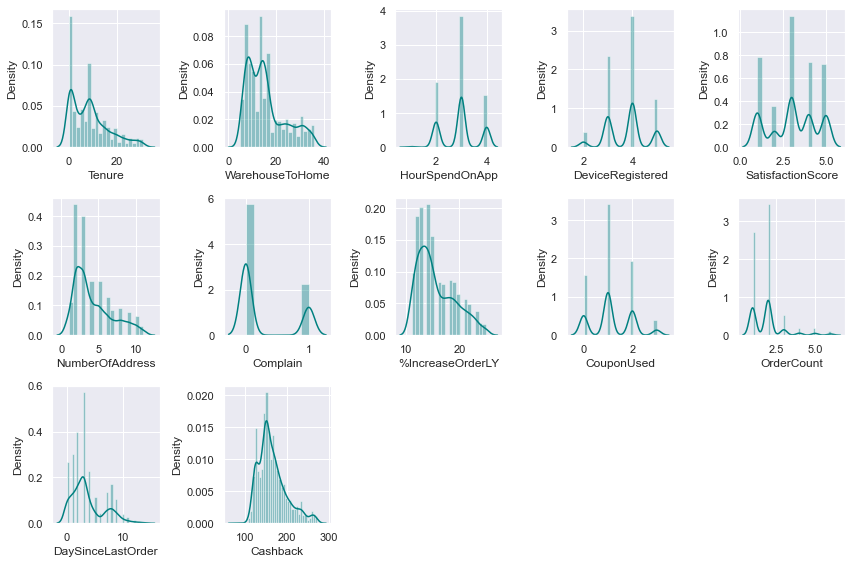

In [84]:
# Recheck distribution
plt.figure(figsize=(12,8))
for i in range(0, len(nums3)):
    sns.set_style('darkgrid')
    plt.subplot(3, 5, i+1)
    sns.distplot(x=X_train[nums3[i]], color='teal')
    plt.xlabel(nums3[i])
    plt.tight_layout()

In [85]:
X_train.describe().transpose()

count        mean        std   min     25%  \
Tenure                       2833.0    8.945994   7.803663   0.0    2.00   
WarehouseToHome              2833.0   15.622309   7.953117   5.0    9.00   
Gender                       2833.0    0.606777   0.488552   0.0    0.00   
HourSpendOnApp               2833.0    2.933992   0.699742   1.0    2.00   
DeviceRegistered             2833.0    3.743735   0.795900   2.0    3.00   
SatisfactionScore            2833.0    3.070950   1.377628   1.0    2.00   
NumberOfAddress              2833.0    4.244970   2.567176   1.0    2.00   
Complain                     2833.0    0.280974   0.449554   0.0    0.00   
%IncreaseOrderLY             2833.0   15.654783   3.547915  11.0   13.00   
CouponUsed                   2833.0    1.163431   0.821526   0.0    1.00   
OrderCount                   2833.0    1.894811   1.019695   1.0    1.00   
DaySinceLastOrder            2833.0    3.655842   2.926564   0.0    2.00   
Cashback                     2833.0  164.384345  33.543328  81.0  142.86   
LoginDevice_Computer         2833.0    0.297564   0.457268   0.0    0.00   
LoginDevice_Phone            2833.0    0.702436   0.457268   0.0    0.00   
PayMethod_CC                 2833.0    0.302153   0.459272   0.0    0.00   
PayMethod_COD                2833.0    0.098129   0.297542   0.0    0.00   
PayMethod_Debit Card         2833.0    0.409460   0.491821   0.0    0.00   
PayMethod_Others             2833.0    0.190258   0.392574   0.0    0.00   
OrderCat_Laptop & Accessory  2833.0    0.400282   0.490042   0.0    0.00   
OrderCat_Others              2833.0    0.167667   0.373636   0.0    0.00   
OrderCat_Phone               2833.0    0.432051   0.495449   0.0    0.00   
Status_Divorced              2833.0    0.147194   0.354362   0.0    0.00   
Status_Married               2833.0    0.516061   0.499830   0.0    0.00   
Status_Single                2833.0    0.336745   0.472680   0.0    0.00   
CityTier_1                   2833.0    0.647723   0.477764   0.0    0.00   
CityTier_2                   2833.0    0.044829   0.206964   0.0    0.00   
CityTier_3                   2833.0    0.307448   0.461518   0.0    0.00   
TenureSegmentation_high      2833.0    0.267914   0.442951   0.0    0.00   
TenureSegmentation_low       2833.0    0.277444   0.447817   0.0    0.00   
TenureSegmentation_mid       2833.0    0.454642   0.498026   0.0    0.00   

                                50%     75%     max  
Tenure                         8.00   13.00   31.00  
WarehouseToHome               14.00   20.00   36.00  
Gender                         1.00    1.00    1.00  
HourSpendOnApp                 3.00    3.00    4.00  
DeviceRegistered               4.00    4.00    5.00  
SatisfactionScore              3.00    4.00    5.00  
NumberOfAddress                3.00    6.00   11.00  
Complain                       0.00    1.00    1.00  
%IncreaseOrderLY              15.00   18.00   25.00  
CouponUsed                     1.00    2.00    3.00  
OrderCount                     2.00    2.00    6.00  
DaySinceLastOrder              3.00    5.00   14.00  
Cashback                     156.62  179.88  272.32  
LoginDevice_Computer           0.00    1.00    1.00  
LoginDevice_Phone              1.00    1.00    1.00  
PayMethod_CC                   0.00    1.00    1.00  
PayMethod_COD                  0.00    0.00    1.00  
PayMethod_Debit Card           0.00    1.00    1.00  
PayMethod_Others               0.00    0.00    1.00  
OrderCat_Laptop & Accessory    0.00    1.00    1.00  
OrderCat_Others                0.00    0.00    1.00  
OrderCat_Phone                 0.00    1.00    1.00  
Status_Divorced                0.00    0.00    1.00  
Status_Married                 1.00    1.00    1.00  
Status_Single                  0.00    1.00    1.00  
CityTier_1                     1.00    1.00    1.00  
CityTier_2                     0.00    0.00    1.00  
CityTier_3                     0.00    1.00    1.00  
TenureSegmentation_high        

Skewed (mean>median):
- Tenure
- WarehouseToHome
- NumberOfAddress
- %IncreaseOrderLY
- CouponUsed
- DaySinceLastOrder
- Cashback

Normal (median>mean):
- DeviceRegistered
- HourSpendOnApp
- SatisfactionScore
- OrderCount

In [86]:
skewed_0 = ['Tenure','CouponUsed','DaySinceLastOrder']
skewed = ['WarehouseToHome','NumberOfAddress','%IncreaseOrderLY','Cashback']
normal = ['HourSpendOnApp','StatisfactionScore','OrderCount']

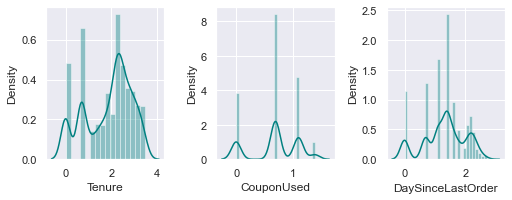

In [87]:
# Check distribution after log transform for column ['Tenure','CouponUsed','DaySinceLastOrder']
plt.figure(figsize=(12,8))
for i in range(0, len(skewed_0)):
    sns.set_style('darkgrid')
    plt.subplot(3,5,i+1)
    logt = np.log(X_train[skewed_0[i]]+1)
    sns.distplot(x=logt, color='teal')
    plt.xlabel(skewed_0[i])
    plt.tight_layout()
    
    # Log Transformation
    X_train['log_'+str(skewed_0[i])] = logt
    X_train = X_train.drop(columns=skewed_0[i])

In [88]:
X_train.describe().transpose()[5:8]

count       mean       std   min   25%   50%   75%   max
NumberOfAddress   2833.0   4.244970  2.567176   1.0   2.0   3.0   6.0  11.0
Complain          2833.0   0.280974  0.449554   0.0   0.0   0.0   1.0   1.0
%IncreaseOrderLY  2833.0  15.654783  3.547915  11.0  13.0  15.0  18.0  25.0

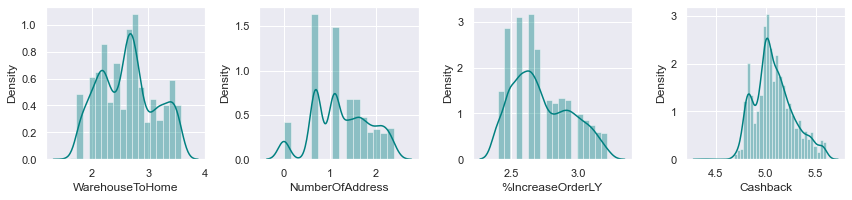

In [89]:
# Check distribution after log trasform for column ['WarehouseToHome','NumberOfAddress','%IncreaseOrderLY','Cashback']
plt.figure(figsize=(12,8))
for i in range(0, len(skewed)):
    sns.set_style('darkgrid')
    plt.subplot(3,4,i+1)
    sns.distplot(x=np.log(X_train[skewed[i]]), color='teal')
    plt.xlabel(skewed[i])
    plt.tight_layout()
    
    # Log Transformation
    X_train['log_'+str(skewed[i])] = np.log(dfclean[skewed[i]])
    X_train = X_train.drop(columns=skewed[i])

In [90]:
X_train.describe().transpose()[8:]

count      mean       std       min       25%  \
PayMethod_CC                 2833.0  0.302153  0.459272  0.000000  0.000000   
PayMethod_COD                2833.0  0.098129  0.297542  0.000000  0.000000   
PayMethod_Debit Card         2833.0  0.409460  0.491821  0.000000  0.000000   
PayMethod_Others             2833.0  0.190258  0.392574  0.000000  0.000000   
OrderCat_Laptop & Accessory  2833.0  0.400282  0.490042  0.000000  0.000000   
OrderCat_Others              2833.0  0.167667  0.373636  0.000000  0.000000   
OrderCat_Phone               2833.0  0.432051  0.495449  0.000000  0.000000   
Status_Divorced              2833.0  0.147194  0.354362  0.000000  0.000000   
Status_Married               2833.0  0.516061  0.499830  0.000000  0.000000   
Status_Single                2833.0  0.336745  0.472680  0.000000  0.000000   
CityTier_1                   2833.0  0.647723  0.477764  0.000000  0.000000   
CityTier_2                   2833.0  0.044829  0.206964  0.000000  0.000000   
CityTier_3                   2833.0  0.307448  0.461518  0.000000  0.000000   
TenureSegmentation_high      2833.0  0.267914  0.442951  0.000000  0.000000   
TenureSegmentation_low       2833.0  0.277444  0.447817  0.000000  0.000000   
TenureSegmentation_mid       2833.0  0.454642  0.498026  0.000000  0.000000   
log_Tenure                   2833.0  1.892391  1.006523  0.000000  1.098612   
log_CouponUsed               2833.0  0.691510  0.415775  0.000000  0.693147   
log_DaySinceLastOrder        2833.0  1.329385  0.677114  0.000000  1.098612   
log_WarehouseToHome          2833.0  2.626159  0.493445  1.609438  2.197225   
log_NumberOfAddress          2833.0  1.264553  0.612538  0.000000  0.693147   
log_%IncreaseOrderLY         2833.0  2.726619  0.216925  2.397895  2.564949   
log_Cashback                 2833.0  5.082951  0.193177  4.394449  4.961865   

                                  50%       75%       max  
PayMethod_CC                 0.000000  1.000000  1.000000  
PayMethod_COD                0.000000  0.000000  1.000000  
PayMethod_Debit Card         0.000000  1.000000  1.000000  
PayMethod_Others             0.000000  0.000000  1.000000  
OrderCat_Laptop & Accessory  0.000000  1.000000  1.000000  
OrderCat_Others              0.000000  0.000000  1.000000  
OrderCat_Phone               0.000000  1.000000  1.000000  
Status_Divorced              0.000000  0.000000  1.000000  
Status_Married               1.000000  1.000000  1.000000  
Status_Single                0.000000  1.000000  1.000000  
CityTier_1                   1.000000  1.000000  1.000000  
CityTier_2                   0.000000  0.000000  1.000000  
CityTier_3                   0.000000  1.000000  1.000000  
TenureSegmentation_high      0.000000  1.000000  1.000000  
TenureSegmentation_low       0.000000  1.000000  1.000000  
TenureSegmentation_mid       0.000000  1.000000  1.000000  
log_Tenure                   2.197225  2.639057  3.465736  
log_CouponUsed               0.693147  1.098612  1.386294  
log_DaySinceLastOrder        1.386294  1.791759  2.708050  
log_WarehouseToHome          2.639057  2.995732  3.583519  
log_NumberOfAddress          1.098612  1.791759  2.397895  
log_%IncreaseOrderLY         2.708050  2.890372  3.218876  
log_Cashback                 5.053822  5.192290  5.606978

**Standardization**

In [91]:
X_train.describe().transpose()

count      mean       std       min       25%  \
Gender                       2833.0  0.606777  0.488552  0.000000  0.000000   
HourSpendOnApp               2833.0  2.933992  0.699742  1.000000  2.000000   
DeviceRegistered             2833.0  3.743735  0.795900  2.000000  3.000000   
SatisfactionScore            2833.0  3.070950  1.377628  1.000000  2.000000   
Complain                     2833.0  0.280974  0.449554  0.000000  0.000000   
OrderCount                   2833.0  1.894811  1.019695  1.000000  1.000000   
LoginDevice_Computer         2833.0  0.297564  0.457268  0.000000  0.000000   
LoginDevice_Phone            2833.0  0.702436  0.457268  0.000000  0.000000   
PayMethod_CC                 2833.0  0.302153  0.459272  0.000000  0.000000   
PayMethod_COD                2833.0  0.098129  0.297542  0.000000  0.000000   
PayMethod_Debit Card         2833.0  0.409460  0.491821  0.000000  0.000000   
PayMethod_Others             2833.0  0.190258  0.392574  0.000000  0.000000   
OrderCat_Laptop & Accessory  2833.0  0.400282  0.490042  0.000000  0.000000   
OrderCat_Others              2833.0  0.167667  0.373636  0.000000  0.000000   
OrderCat_Phone               2833.0  0.432051  0.495449  0.000000  0.000000   
Status_Divorced              2833.0  0.147194  0.354362  0.000000  0.000000   
Status_Married               2833.0  0.516061  0.499830  0.000000  0.000000   
Status_Single                2833.0  0.336745  0.472680  0.000000  0.000000   
CityTier_1                   2833.0  0.647723  0.477764  0.000000  0.000000   
CityTier_2                   2833.0  0.044829  0.206964  0.000000  0.000000   
CityTier_3                   2833.0  0.307448  0.461518  0.000000  0.000000   
TenureSegmentation_high      2833.0  0.267914  0.442951  0.000000  0.000000   
TenureSegmentation_low       2833.0  0.277444  0.447817  0.000000  0.000000   
TenureSegmentation_mid       2833.0  0.454642  0.498026  0.000000  0.000000   
log_Tenure                   2833.0  1.892391  1.006523  0.000000  1.098612   
log_CouponUsed               2833.0  0.691510  0.415775  0.000000  0.693147   
log_DaySinceLastOrder        2833.0  1.329385  0.677114  0.000000  1.098612   
log_WarehouseToHome          2833.0  2.626159  0.493445  1.609438  2.197225   
log_NumberOfAddress          2833.0  1.264553  0.612538  0.000000  0.693147   
log_%IncreaseOrderLY         2833.0  2.726619  0.216925  2.397895  2.564949   
log_Cashback                 2833.0  5.082951  0.193177  4.394449  4.961865   

                                  50%       75%       max  
Gender                       1.000000  1.000000  1.000000  
HourSpendOnApp               3.000000  3.000000  4.000000  
DeviceRegistered             4.000000  4.000000  5.000000  
SatisfactionScore            3.000000  4.000000  5.000000  
Complain                     0.000000  1.000000  1.000000  
OrderCount                   2.000000  2.000000  6.000000  
LoginDevice_Computer         0.000000  1.000000  1.000000  
LoginDevice_Phone            1.000000  1.000000  1.000000  
PayMethod_CC                 0.000000  1.000000  1.000000  
PayMethod_COD                0.000000  0.000000  1.000000  
PayMethod_Debit Card         0.000000  1.000000  1.000000  
PayMethod_Others             0.000000  0.000000  1.000000  
OrderCat_Laptop & Accessory  0.000000  1.000000  1.000000  
OrderCat_Others              0.000000  0.000000  1.000000  
OrderCat_Phone               0.000000  1.000000  1.000000  
Status_Divorced              0.000000  0.000000  1.000000  
Status_Married               1.000000  1.000000  1.000000  
Status_Single                0.000000  1.000000  1.000000  
CityTier_1                   1.000000  1.000000  1.000000  
CityTier_2                   0.000000  0.000000  1.000000  
CityTier_3                   0.000000  1.000000  1.000000  
TenureSegmentation_high      0.000000  1.000000  1.000000  
TenureSegmentation_low       0.000000  1.000000  1.000000  
TenureSegmentation_mid       0.000000  1.000000  1.000000  
l

In [92]:
to_std = ['HourSpendOnApp','DeviceRegistered','SatisfactionScore','OrderCount','log_Tenure', 
          'log_CouponUsed', 'log_DaySinceLastOrder', 'log_WarehouseToHome',
          'log_NumberOfAddress', 'log_%IncreaseOrderLY', 'log_Cashback']

In [93]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

for i in range(0, len(to_std)):
    X_train[to_std[i]] = StandardScaler().fit_transform(X_train[to_std[i]].values.reshape(len(X_train),1))

In [94]:
X_train.describe().transpose()

count          mean       std       min  \
Gender                       2833.0  6.067773e-01  0.488552  0.000000   
HourSpendOnApp               2833.0 -4.623121e-16  1.000177 -2.764353   
DeviceRegistered             2833.0 -3.893814e-16  1.000177 -2.191282   
SatisfactionScore            2833.0  2.724416e-16  1.000177 -1.503537   
Complain                     2833.0  2.809742e-01  0.449554  0.000000   
OrderCount                   2833.0 -1.420012e-16  1.000177 -0.877683   
LoginDevice_Computer         2833.0  2.975644e-01  0.457268  0.000000   
LoginDevice_Phone            2833.0  7.024356e-01  0.457268  0.000000   
PayMethod_CC                 2833.0  3.021532e-01  0.459272  0.000000   
PayMethod_COD                2833.0  9.812919e-02  0.297542  0.000000   
PayMethod_Debit Card         2833.0  4.094599e-01  0.491821  0.000000   
PayMethod_Others             2833.0  1.902577e-01  0.392574  0.000000   
OrderCat_Laptop & Accessory  2833.0  4.002824e-01  0.490042  0.000000   
OrderCat_Others              2833.0  1.676668e-01  0.373636  0.000000   
OrderCat_Phone               2833.0  4.320508e-01  0.495449  0.000000   
Status_Divorced              2833.0  1.471938e-01  0.354362  0.000000   
Status_Married               2833.0  5.160607e-01  0.499830  0.000000   
Status_Single                2833.0  3.367455e-01  0.472680  0.000000   
CityTier_1                   2833.0  6.477233e-01  0.477764  0.000000   
CityTier_2                   2833.0  4.482880e-02  0.206964  0.000000   
CityTier_3                   2833.0  3.074479e-01  0.461518  0.000000   
TenureSegmentation_high      2833.0  2.679139e-01  0.442951  0.000000   
TenureSegmentation_low       2833.0  2.774444e-01  0.447817  0.000000   
TenureSegmentation_mid       2833.0  4.546417e-01  0.498026  0.000000   
log_Tenure                   2833.0 -1.000494e-16  1.000177 -1.880460   
log_CouponUsed               2833.0  2.772110e-16  1.000177 -1.663478   
log_DaySinceLastOrder        2833.0  4.851592e-17  1.000177 -1.963657   
log_WarehouseToHome          2833.0  9.658117e-16  1.000177 -2.060819   
log_NumberOfAddress          2833.0 -3.704140e-16  1.000177 -2.064814   
log_%IncreaseOrderLY         2833.0 -1.131385e-15  1.000177 -1.515646   
log_Cashback                 2833.0 -1.356957e-15  1.000177 -3.564728   

                                  25%       50%       75%       max  
Gender                       0.000000  1.000000  1.000000  1.000000  
HourSpendOnApp              -1.335003  0.094348  0.094348  1.523699  
DeviceRegistered            -0.934622  0.322039  0.322039  1.578699  
SatisfactionScore           -0.777524 -0.051510  0.674503  1.400516  
Complain                     0.000000  0.000000  1.000000  1.000000  
OrderCount                  -0.877683  0.103175  0.103175  4.026608  
LoginDevice_Computer         0.000000  0.000000  1.000000  1.000000  
LoginDevice_Phone            0.000000  1.000000  1.000000  1.000000  
PayMethod_CC                 0.000000  0.000000  1.000000  1.000000  
PayMethod_COD                0.000000  0.000000  0.000000  1.000000  
PayMethod_Debit Card         0.000000  0.000000  1.000000  1.000000  
PayMethod_Others             0.000000  0.000000  0.000000  1.000000  
OrderCat_Laptop & Accessory  0.000000  0.000000  1.000000  1.000000  
OrderCat_Others              0.000000  0.000000  0.000000  1.000000  
OrderCat_Phone               0.000000  0.000000  1.000000  1.000000  
Status_Divorced              0.000000  0.000000  0.000000  1.000000  
Status_Married               0.000000  1.000000  1.000000  1.000000  
Status_Single                0.000000  0.000000  1.000000  1.000000  
CityTier_1                   0.000000  1.000000  1.000000  1.000000  
CityTier_2                   0.000000  0.000000  0.000000  1.000000  
CityTier_3                   0.000000  0.000000  1.000000  1.000000  
TenureSegmentation_high      0.000000  0.000000  1.000000  1.000000  
TenureSegmentation_low       0.000000  0.000000  1.000000  1.000000  
TenureSegment

## d. Feature Selection

<AxesSubplot:>

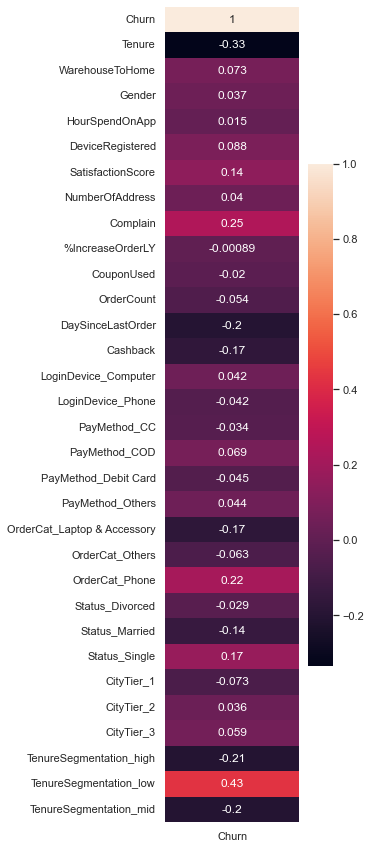

In [95]:
plt.figure(figsize=(3,15))
sns.heatmap(df_encode.corr()[['Churn']],annot=True)

In [96]:
df_select = X_train.copy()

In [97]:
df_select.columns

Index(['Gender', 'HourSpendOnApp', 'DeviceRegistered', 'SatisfactionScore',
       'Complain', 'OrderCount', 'LoginDevice_Computer', 'LoginDevice_Phone',
       'PayMethod_CC', 'PayMethod_COD', 'PayMethod_Debit Card',
       'PayMethod_Others', 'OrderCat_Laptop & Accessory', 'OrderCat_Others',
       'OrderCat_Phone', 'Status_Divorced', 'Status_Married', 'Status_Single',
       'CityTier_1', 'CityTier_2', 'CityTier_3', 'TenureSegmentation_high',
       'TenureSegmentation_low', 'TenureSegmentation_mid', 'log_Tenure',
       'log_CouponUsed', 'log_DaySinceLastOrder', 'log_WarehouseToHome',
       'log_NumberOfAddress', 'log_%IncreaseOrderLY', 'log_Cashback'],
      dtype='object')

In [98]:
df_select = df_select[['log_Tenure','LoginDevice_Phone','DeviceRegistered','SatisfactionScore',
                       'Complain','log_Cashback','log_DaySinceLastOrder','Status_Single','Status_Married',
                       'PayMethod_Debit Card','PayMethod_Others','OrderCat_Phone','OrderCat_Laptop & Accessory']]

df_select.sample(5)

log_Tenure  LoginDevice_Phone  DeviceRegistered  SatisfactionScore  \
2808   -0.281169                  0         -0.934622           1.400516   
1273    0.053182                  0         -0.934622          -0.051510   
2405   -1.880460                  0         -0.934622           1.400516   
3769    0.741958                  1          0.322039           0.674503   
1565    0.407608                  1         -0.934622           0.674503   

      Complain  log_Cashback  log_DaySinceLastOrder  Status_Single  \
2808         0      1.098471               1.107921              1   
1273         0     -0.050630               1.281900              0   
2405         1     -1.047267              -1.963657              1   
3769         0      1.337015               0.084061              1   
1565         0     -0.068169               1.107921              1   

      Status_Married  PayMethod_Debit Card  PayMethod_Others  OrderCat_Phone  \
2808               0                     0                 0               0   
1273               1                     1                 0               0   
2405               0                     0                 0               1   
3769               0                     1                 0               0   
1565               0                     1                 0               0   

      OrderCat_Laptop & Accessory  
2808                            1  
1273                            1  
2405                            0  
3769                            0  
1565                            1

## e. Class Imbalance

In [99]:
# Target Value Distribution
df_encode_a = df_encode.groupby('Churn').agg(Population = ('Churn','count')) #awalnya df_encode dicoba diganti dulu pake df_select
df_encode_a.reset_index(inplace=True)

df_encode_a['%Churn'] = round(100 * df_encode_a['Population']/df_encode_a['Population'].sum(), 2)

df_encode_a

Churn  Population  %Churn
0      0        3324   82.11
1      1         724   17.89

**The data seems to be imbalance (the ratio 18:82), so the lesser value (churn or 1) need to be treated - synthesize after splitting data**

In [100]:
from imblearn import under_sampling, over_sampling
x_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(X_train,y_train)
x_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(X_train,y_train)
x_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(X_train, y_train)

In [101]:
print('ORIGINAL DATA')
print(pd.Series(y_train).value_counts())
print('--'*10,'\n')
print('UNDERSAMPLING DATA')
print(pd.Series(y_under).value_counts())
print('---'*10,'\n')
print(pd.Series(y_over).value_counts())
print('---'*10,'\n')
print(pd.Series(y_over_SMOTE).value_counts())
print('---'*10,'\n')

ORIGINAL DATA
0    2327
1     506
dtype: int64
-------------------- 

UNDERSAMPLING DATA
0    1012
1     506
dtype: int64
------------------------------ 

0    2327
1    1163
dtype: int64
------------------------------ 

0    2327
1    1163
dtype: int64
------------------------------ 



In [102]:
X_train, y_train = x_over_SMOTE, y_over_SMOTE

# 4. MODELLING

## Decision Tree

In [103]:
#Function Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, y_train_pred, y_test_pred, y_train, y_test):
    print('Accuracy (Train Set): %.2f' % accuracy_score(y_train, y_train_pred))
    print('Accuracy (Test Set): %.2f' % accuracy_score(y_test, y_test_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_train_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_test_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_train_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_test_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_train_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_test_pred))
    
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred, pos_label=1)
    print("AUC (Train Set) : %.2f" % auc(fpr,tpr))
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred, pos_label=1)
    print("AUC (Test Set) : %.2f" % auc(fpr,tpr))

In [104]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=88)
model_dt.fit(X_train, y_train)

y_pred = model_dt.predict(X_test)
y_pred_train = model_dt.predict(X_train)

In [105]:
# Check Model Performance
eval_classification(model_dt, y_pred_train, y_pred, y_train, y_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.43
Precision (Train Set): 1.00
Precision (Test Set): 0.23
Recall (Train Set): 1.00
Recall (Test Set): 0.93
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.37
AUC (Train Set) : 1.00
AUC (Test Set) : 0.62


In [106]:
print('Train score: ' + str(model_dt.score(X_train, y_train)))
print('Test score: ' + str(model_dt.score(X_test, y_test)))

Train score: 1.0
Test score: 0.4312757201646091


**Train score > test score, so the model is overfitting**

### Hyperparameter Tuning with Random Search

In [107]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num=30)] # Maximum number of levels in tree
min_samples_split = [50,100,1000] # Minimum member of samples required to split a node
min_samples_leaf = [1,2,4,10,20,50] # Minimum number of samples required at each leaf node
max_features = ['auto','sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split = min_samples_split,
                       min_samples_leaf = min_samples_leaf,
                       max_features = max_features
                      )

# Initiate Model
dt = DecisionTreeClassifier(random_state=42)
model_dt_tuned = RandomizedSearchCV(dt, hyperparameters, cv=20, random_state=42, n_iter=50, verbose=500, scoring='recall')
model_dt_tuned.fit(X_train, y_train)

# Predict & Evalation
y_pred = model_dt_tuned.predict(X_test)

Fitting 20 folds for each of 50 candidates, totalling 1000 fits
[CV 1/20; 1/50] START max_depth=42, max_features=sqrt, min_samples_leaf=10, min_samples_split=50
[CV 1/20; 1/50] END max_depth=42, max_features=sqrt, min_samples_leaf=10, min_samples_split=50;, score=0.672 total time=   0.0s
[CV 2/20; 1/50] START max_depth=42, max_features=sqrt, min_samples_leaf=10, min_samples_split=50
[CV 2/20; 1/50] END max_depth=42, max_features=sqrt, min_samples_leaf=10, min_samples_split=50;, score=0.655 total time=   0.0s
[CV 3/20; 1/50] START max_depth=42, max_features=sqrt, min_samples_leaf=10, min_samples_split=50
[CV 3/20; 1/50] END max_depth=42, max_features=sqrt, min_samples_leaf=10, min_samples_split=50;, score=0.517 total time=   0.0s
[CV 4/20; 1/50] START max_depth=42, max_features=sqrt, min_samples_leaf=10, min_samples_split=50
[CV 4/20; 1/50] END max_depth=42, max_features=sqrt, min_samples_leaf=10, min_samples_split=50;, score=0.707 total time=   0.0s
[CV 5/20; 1/50] START max_depth=42, 

[CV 10/20; 3/50] END max_depth=76, max_features=auto, min_samples_leaf=10, min_samples_split=1000;, score=0.356 total time=   0.0s
[CV 11/20; 3/50] START max_depth=76, max_features=auto, min_samples_leaf=10, min_samples_split=1000
[CV 11/20; 3/50] END max_depth=76, max_features=auto, min_samples_leaf=10, min_samples_split=1000;, score=0.621 total time=   0.0s
[CV 12/20; 3/50] START max_depth=76, max_features=auto, min_samples_leaf=10, min_samples_split=1000
[CV 12/20; 3/50] END max_depth=76, max_features=auto, min_samples_leaf=10, min_samples_split=1000;, score=0.586 total time=   0.0s
[CV 13/20; 3/50] START max_depth=76, max_features=auto, min_samples_leaf=10, min_samples_split=1000
[CV 13/20; 3/50] END max_depth=76, max_features=auto, min_samples_leaf=10, min_samples_split=1000;, score=0.500 total time=   0.0s
[CV 14/20; 3/50] START max_depth=76, max_features=auto, min_samples_leaf=10, min_samples_split=1000
[CV 14/20; 3/50] END max_depth=76, max_features=auto, min_samples_leaf=10, m

[CV 8/20; 5/50] END max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=100;, score=0.508 total time=   0.0s
[CV 9/20; 5/50] START max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=100
[CV 9/20; 5/50] END max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=100;, score=0.780 total time=   0.0s
[CV 10/20; 5/50] START max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=100
[CV 10/20; 5/50] END max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=100;, score=0.610 total time=   0.0s
[CV 11/20; 5/50] START max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=100
[CV 11/20; 5/50] END max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=100;, score=0.741 total time=   0.0s
[CV 12/20; 5/50] START max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=100
[CV 12/20; 5/50] END max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_

[CV 5/20; 7/50] END max_depth=102, max_features=sqrt, min_samples_leaf=1, min_samples_split=100;, score=0.552 total time=   0.0s
[CV 6/20; 7/50] START max_depth=102, max_features=sqrt, min_samples_leaf=1, min_samples_split=100
[CV 6/20; 7/50] END max_depth=102, max_features=sqrt, min_samples_leaf=1, min_samples_split=100;, score=0.724 total time=   0.0s
[CV 7/20; 7/50] START max_depth=102, max_features=sqrt, min_samples_leaf=1, min_samples_split=100
[CV 7/20; 7/50] END max_depth=102, max_features=sqrt, min_samples_leaf=1, min_samples_split=100;, score=0.655 total time=   0.0s
[CV 8/20; 7/50] START max_depth=102, max_features=sqrt, min_samples_leaf=1, min_samples_split=100
[CV 8/20; 7/50] END max_depth=102, max_features=sqrt, min_samples_leaf=1, min_samples_split=100;, score=0.492 total time=   0.0s
[CV 9/20; 7/50] START max_depth=102, max_features=sqrt, min_samples_leaf=1, min_samples_split=100
[CV 9/20; 7/50] END max_depth=102, max_features=sqrt, min_samples_leaf=1, min_samples_split=

[CV 11/20; 9/50] END max_depth=110, max_features=sqrt, min_samples_leaf=10, min_samples_split=50;, score=0.793 total time=   0.0s
[CV 12/20; 9/50] START max_depth=110, max_features=sqrt, min_samples_leaf=10, min_samples_split=50
[CV 12/20; 9/50] END max_depth=110, max_features=sqrt, min_samples_leaf=10, min_samples_split=50;, score=0.741 total time=   0.0s
[CV 13/20; 9/50] START max_depth=110, max_features=sqrt, min_samples_leaf=10, min_samples_split=50
[CV 13/20; 9/50] END max_depth=110, max_features=sqrt, min_samples_leaf=10, min_samples_split=50;, score=0.776 total time=   0.0s
[CV 14/20; 9/50] START max_depth=110, max_features=sqrt, min_samples_leaf=10, min_samples_split=50
[CV 14/20; 9/50] END max_depth=110, max_features=sqrt, min_samples_leaf=10, min_samples_split=50;, score=0.759 total time=   0.0s
[CV 15/20; 9/50] START max_depth=110, max_features=sqrt, min_samples_leaf=10, min_samples_split=50
[CV 15/20; 9/50] END max_depth=110, max_features=sqrt, min_samples_leaf=10, min_samp

[CV 15/20; 11/50] END max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=100;, score=0.724 total time=   0.0s
[CV 16/20; 11/50] START max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=100
[CV 16/20; 11/50] END max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=100;, score=0.655 total time=   0.0s
[CV 17/20; 11/50] START max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=100
[CV 17/20; 11/50] END max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=100;, score=0.810 total time=   0.0s
[CV 18/20; 11/50] START max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=100
[CV 18/20; 11/50] END max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=100;, score=0.707 total time=   0.0s
[CV 19/20; 11/50] START max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=100
[CV 19/20; 11/50] END max_depth=110, max_features=auto, min_samples_leaf=2, 

[CV 16/20; 13/50] END max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=100;, score=0.655 total time=   0.0s
[CV 17/20; 13/50] START max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=100
[CV 17/20; 13/50] END max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=100;, score=0.810 total time=   0.0s
[CV 18/20; 13/50] START max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=100
[CV 18/20; 13/50] END max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=100;, score=0.707 total time=   0.0s
[CV 19/20; 13/50] START max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=100
[CV 19/20; 13/50] END max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=100;, score=0.741 total time=   0.0s
[CV 20/20; 13/50] START max_depth=64, max_features=sqrt, min_samples_leaf=2, min_samples_split=100
[CV 20/20; 13/50] END max_depth=64, max_features=sqrt, min_samples_leaf=2, min_sampl

[CV 15/20; 15/50] END max_depth=38, max_features=auto, min_samples_leaf=2, min_samples_split=1000;, score=0.707 total time=   0.0s
[CV 16/20; 15/50] START max_depth=38, max_features=auto, min_samples_leaf=2, min_samples_split=1000
[CV 16/20; 15/50] END max_depth=38, max_features=auto, min_samples_leaf=2, min_samples_split=1000;, score=0.431 total time=   0.0s
[CV 17/20; 15/50] START max_depth=38, max_features=auto, min_samples_leaf=2, min_samples_split=1000
[CV 17/20; 15/50] END max_depth=38, max_features=auto, min_samples_leaf=2, min_samples_split=1000;, score=0.569 total time=   0.0s
[CV 18/20; 15/50] START max_depth=38, max_features=auto, min_samples_leaf=2, min_samples_split=1000
[CV 18/20; 15/50] END max_depth=38, max_features=auto, min_samples_leaf=2, min_samples_split=1000;, score=0.500 total time=   0.0s
[CV 19/20; 15/50] START max_depth=38, max_features=auto, min_samples_leaf=2, min_samples_split=1000
[CV 19/20; 15/50] END max_depth=38, max_features=auto, min_samples_leaf=2, m

[CV 19/20; 17/50] END max_depth=34, max_features=auto, min_samples_leaf=10, min_samples_split=50;, score=0.707 total time=   0.0s
[CV 20/20; 17/50] START max_depth=34, max_features=auto, min_samples_leaf=10, min_samples_split=50
[CV 20/20; 17/50] END max_depth=34, max_features=auto, min_samples_leaf=10, min_samples_split=50;, score=0.724 total time=   0.0s
[CV 1/20; 18/50] START max_depth=49, max_features=sqrt, min_samples_leaf=10, min_samples_split=50
[CV 1/20; 18/50] END max_depth=49, max_features=sqrt, min_samples_leaf=10, min_samples_split=50;, score=0.672 total time=   0.0s
[CV 2/20; 18/50] START max_depth=49, max_features=sqrt, min_samples_leaf=10, min_samples_split=50
[CV 2/20; 18/50] END max_depth=49, max_features=sqrt, min_samples_leaf=10, min_samples_split=50;, score=0.655 total time=   0.0s
[CV 3/20; 18/50] START max_depth=49, max_features=sqrt, min_samples_leaf=10, min_samples_split=50
[CV 3/20; 18/50] END max_depth=49, max_features=sqrt, min_samples_leaf=10, min_samples_sp

[CV 4/20; 20/50] END max_depth=91, max_features=sqrt, min_samples_leaf=10, min_samples_split=1000;, score=0.448 total time=   0.0s
[CV 5/20; 20/50] START max_depth=91, max_features=sqrt, min_samples_leaf=10, min_samples_split=1000
[CV 5/20; 20/50] END max_depth=91, max_features=sqrt, min_samples_leaf=10, min_samples_split=1000;, score=0.379 total time=   0.0s
[CV 6/20; 20/50] START max_depth=91, max_features=sqrt, min_samples_leaf=10, min_samples_split=1000
[CV 6/20; 20/50] END max_depth=91, max_features=sqrt, min_samples_leaf=10, min_samples_split=1000;, score=0.534 total time=   0.0s
[CV 7/20; 20/50] START max_depth=91, max_features=sqrt, min_samples_leaf=10, min_samples_split=1000
[CV 7/20; 20/50] END max_depth=91, max_features=sqrt, min_samples_leaf=10, min_samples_split=1000;, score=0.552 total time=   0.0s
[CV 8/20; 20/50] START max_depth=91, max_features=sqrt, min_samples_leaf=10, min_samples_split=1000
[CV 8/20; 20/50] END max_depth=91, max_features=sqrt, min_samples_leaf=10, m

[CV 20/20; 21/50] END max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=1000;, score=0.448 total time=   0.0s
[CV 1/20; 22/50] START max_depth=4, max_features=sqrt, min_samples_leaf=50, min_samples_split=100
[CV 1/20; 22/50] END max_depth=4, max_features=sqrt, min_samples_leaf=50, min_samples_split=100;, score=0.655 total time=   0.0s
[CV 2/20; 22/50] START max_depth=4, max_features=sqrt, min_samples_leaf=50, min_samples_split=100
[CV 2/20; 22/50] END max_depth=4, max_features=sqrt, min_samples_leaf=50, min_samples_split=100;, score=0.569 total time=   0.0s
[CV 3/20; 22/50] START max_depth=4, max_features=sqrt, min_samples_leaf=50, min_samples_split=100
[CV 3/20; 22/50] END max_depth=4, max_features=sqrt, min_samples_leaf=50, min_samples_split=100;, score=0.621 total time=   0.0s
[CV 4/20; 22/50] START max_depth=4, max_features=sqrt, min_samples_leaf=50, min_samples_split=100
[CV 4/20; 22/50] END max_depth=4, max_features=sqrt, min_samples_leaf=50, min_samples_split

[CV 16/20; 23/50] START max_depth=49, max_features=auto, min_samples_leaf=50, min_samples_split=1000
[CV 16/20; 23/50] END max_depth=49, max_features=auto, min_samples_leaf=50, min_samples_split=1000;, score=0.431 total time=   0.0s
[CV 17/20; 23/50] START max_depth=49, max_features=auto, min_samples_leaf=50, min_samples_split=1000
[CV 17/20; 23/50] END max_depth=49, max_features=auto, min_samples_leaf=50, min_samples_split=1000;, score=0.569 total time=   0.0s
[CV 18/20; 23/50] START max_depth=49, max_features=auto, min_samples_leaf=50, min_samples_split=1000
[CV 18/20; 23/50] END max_depth=49, max_features=auto, min_samples_leaf=50, min_samples_split=1000;, score=0.500 total time=   0.0s
[CV 19/20; 23/50] START max_depth=49, max_features=auto, min_samples_leaf=50, min_samples_split=1000
[CV 19/20; 23/50] END max_depth=49, max_features=auto, min_samples_leaf=50, min_samples_split=1000;, score=0.569 total time=   0.0s
[CV 20/20; 23/50] START max_depth=49, max_features=auto, min_samples

[CV 16/20; 25/50] END max_depth=53, max_features=sqrt, min_samples_leaf=4, min_samples_split=50;, score=0.776 total time=   0.0s
[CV 17/20; 25/50] START max_depth=53, max_features=sqrt, min_samples_leaf=4, min_samples_split=50
[CV 17/20; 25/50] END max_depth=53, max_features=sqrt, min_samples_leaf=4, min_samples_split=50;, score=0.724 total time=   0.0s
[CV 18/20; 25/50] START max_depth=53, max_features=sqrt, min_samples_leaf=4, min_samples_split=50
[CV 18/20; 25/50] END max_depth=53, max_features=sqrt, min_samples_leaf=4, min_samples_split=50;, score=0.690 total time=   0.0s
[CV 19/20; 25/50] START max_depth=53, max_features=sqrt, min_samples_leaf=4, min_samples_split=50
[CV 19/20; 25/50] END max_depth=53, max_features=sqrt, min_samples_leaf=4, min_samples_split=50;, score=0.655 total time=   0.0s
[CV 20/20; 25/50] START max_depth=53, max_features=sqrt, min_samples_leaf=4, min_samples_split=50
[CV 20/20; 25/50] END max_depth=53, max_features=sqrt, min_samples_leaf=4, min_samples_split

[CV 20/20; 27/50] END max_depth=87, max_features=auto, min_samples_leaf=10, min_samples_split=50;, score=0.724 total time=   0.0s
[CV 1/20; 28/50] START max_depth=38, max_features=auto, min_samples_leaf=10, min_samples_split=1000
[CV 1/20; 28/50] END max_depth=38, max_features=auto, min_samples_leaf=10, min_samples_split=1000;, score=0.500 total time=   0.0s
[CV 2/20; 28/50] START max_depth=38, max_features=auto, min_samples_leaf=10, min_samples_split=1000
[CV 2/20; 28/50] END max_depth=38, max_features=auto, min_samples_leaf=10, min_samples_split=1000;, score=0.328 total time=   0.0s
[CV 3/20; 28/50] START max_depth=38, max_features=auto, min_samples_leaf=10, min_samples_split=1000
[CV 3/20; 28/50] END max_depth=38, max_features=auto, min_samples_leaf=10, min_samples_split=1000;, score=0.397 total time=   0.0s
[CV 4/20; 28/50] START max_depth=38, max_features=auto, min_samples_leaf=10, min_samples_split=1000
[CV 4/20; 28/50] END max_depth=38, max_features=auto, min_samples_leaf=10, mi

[CV 2/20; 30/50] END max_depth=79, max_features=auto, min_samples_leaf=2, min_samples_split=100;, score=0.483 total time=   0.0s
[CV 3/20; 30/50] START max_depth=79, max_features=auto, min_samples_leaf=2, min_samples_split=100
[CV 3/20; 30/50] END max_depth=79, max_features=auto, min_samples_leaf=2, min_samples_split=100;, score=0.569 total time=   0.0s
[CV 4/20; 30/50] START max_depth=79, max_features=auto, min_samples_leaf=2, min_samples_split=100
[CV 4/20; 30/50] END max_depth=79, max_features=auto, min_samples_leaf=2, min_samples_split=100;, score=0.655 total time=   0.0s
[CV 5/20; 30/50] START max_depth=79, max_features=auto, min_samples_leaf=2, min_samples_split=100
[CV 5/20; 30/50] END max_depth=79, max_features=auto, min_samples_leaf=2, min_samples_split=100;, score=0.483 total time=   0.0s
[CV 6/20; 30/50] START max_depth=79, max_features=auto, min_samples_leaf=2, min_samples_split=100
[CV 6/20; 30/50] END max_depth=79, max_features=auto, min_samples_leaf=2, min_samples_split=

[CV 20/20; 31/50] START max_depth=68, max_features=auto, min_samples_leaf=4, min_samples_split=1000
[CV 20/20; 31/50] END max_depth=68, max_features=auto, min_samples_leaf=4, min_samples_split=1000;, score=0.448 total time=   0.0s
[CV 1/20; 32/50] START max_depth=68, max_features=sqrt, min_samples_leaf=20, min_samples_split=100
[CV 1/20; 32/50] END max_depth=68, max_features=sqrt, min_samples_leaf=20, min_samples_split=100;, score=0.621 total time=   0.0s
[CV 2/20; 32/50] START max_depth=68, max_features=sqrt, min_samples_leaf=20, min_samples_split=100
[CV 2/20; 32/50] END max_depth=68, max_features=sqrt, min_samples_leaf=20, min_samples_split=100;, score=0.586 total time=   0.0s
[CV 3/20; 32/50] START max_depth=68, max_features=sqrt, min_samples_leaf=20, min_samples_split=100
[CV 3/20; 32/50] END max_depth=68, max_features=sqrt, min_samples_leaf=20, min_samples_split=100;, score=0.586 total time=   0.0s
[CV 4/20; 32/50] START max_depth=68, max_features=sqrt, min_samples_leaf=20, min_s

[CV 3/20; 34/50] START max_depth=27, max_features=sqrt, min_samples_leaf=4, min_samples_split=100
[CV 3/20; 34/50] END max_depth=27, max_features=sqrt, min_samples_leaf=4, min_samples_split=100;, score=0.569 total time=   0.0s
[CV 4/20; 34/50] START max_depth=27, max_features=sqrt, min_samples_leaf=4, min_samples_split=100
[CV 4/20; 34/50] END max_depth=27, max_features=sqrt, min_samples_leaf=4, min_samples_split=100;, score=0.586 total time=   0.0s
[CV 5/20; 34/50] START max_depth=27, max_features=sqrt, min_samples_leaf=4, min_samples_split=100
[CV 5/20; 34/50] END max_depth=27, max_features=sqrt, min_samples_leaf=4, min_samples_split=100;, score=0.483 total time=   0.0s
[CV 6/20; 34/50] START max_depth=27, max_features=sqrt, min_samples_leaf=4, min_samples_split=100
[CV 6/20; 34/50] END max_depth=27, max_features=sqrt, min_samples_leaf=4, min_samples_split=100;, score=0.724 total time=   0.0s
[CV 7/20; 34/50] START max_depth=27, max_features=sqrt, min_samples_leaf=4, min_samples_spli

[CV 20/20; 35/50] END max_depth=16, max_features=sqrt, min_samples_leaf=20, min_samples_split=50;, score=0.638 total time=   0.0s
[CV 1/20; 36/50] START max_depth=64, max_features=auto, min_samples_leaf=2, min_samples_split=1000
[CV 1/20; 36/50] END max_depth=64, max_features=auto, min_samples_leaf=2, min_samples_split=1000;, score=0.500 total time=   0.0s
[CV 2/20; 36/50] START max_depth=64, max_features=auto, min_samples_leaf=2, min_samples_split=1000
[CV 2/20; 36/50] END max_depth=64, max_features=auto, min_samples_leaf=2, min_samples_split=1000;, score=0.328 total time=   0.0s
[CV 3/20; 36/50] START max_depth=64, max_features=auto, min_samples_leaf=2, min_samples_split=1000
[CV 3/20; 36/50] END max_depth=64, max_features=auto, min_samples_leaf=2, min_samples_split=1000;, score=0.397 total time=   0.0s
[CV 4/20; 36/50] START max_depth=64, max_features=auto, min_samples_leaf=2, min_samples_split=1000
[CV 4/20; 36/50] END max_depth=64, max_features=auto, min_samples_leaf=2, min_sample

[CV 16/20; 37/50] END max_depth=79, max_features=auto, min_samples_leaf=2, min_samples_split=1000;, score=0.431 total time=   0.0s
[CV 17/20; 37/50] START max_depth=79, max_features=auto, min_samples_leaf=2, min_samples_split=1000
[CV 17/20; 37/50] END max_depth=79, max_features=auto, min_samples_leaf=2, min_samples_split=1000;, score=0.569 total time=   0.0s
[CV 18/20; 37/50] START max_depth=79, max_features=auto, min_samples_leaf=2, min_samples_split=1000
[CV 18/20; 37/50] END max_depth=79, max_features=auto, min_samples_leaf=2, min_samples_split=1000;, score=0.500 total time=   0.0s
[CV 19/20; 37/50] START max_depth=79, max_features=auto, min_samples_leaf=2, min_samples_split=1000
[CV 19/20; 37/50] END max_depth=79, max_features=auto, min_samples_leaf=2, min_samples_split=1000;, score=0.569 total time=   0.0s
[CV 20/20; 37/50] START max_depth=79, max_features=auto, min_samples_leaf=2, min_samples_split=1000
[CV 20/20; 37/50] END max_depth=79, max_features=auto, min_samples_leaf=2, m

[CV 15/20; 39/50] START max_depth=31, max_features=sqrt, min_samples_leaf=2, min_samples_split=50
[CV 15/20; 39/50] END max_depth=31, max_features=sqrt, min_samples_leaf=2, min_samples_split=50;, score=0.759 total time=   0.0s
[CV 16/20; 39/50] START max_depth=31, max_features=sqrt, min_samples_leaf=2, min_samples_split=50
[CV 16/20; 39/50] END max_depth=31, max_features=sqrt, min_samples_leaf=2, min_samples_split=50;, score=0.603 total time=   0.0s
[CV 17/20; 39/50] START max_depth=31, max_features=sqrt, min_samples_leaf=2, min_samples_split=50
[CV 17/20; 39/50] END max_depth=31, max_features=sqrt, min_samples_leaf=2, min_samples_split=50;, score=0.672 total time=   0.0s
[CV 18/20; 39/50] START max_depth=31, max_features=sqrt, min_samples_leaf=2, min_samples_split=50
[CV 18/20; 39/50] END max_depth=31, max_features=sqrt, min_samples_leaf=2, min_samples_split=50;, score=0.690 total time=   0.0s
[CV 19/20; 39/50] START max_depth=31, max_features=sqrt, min_samples_leaf=2, min_samples_spl

[CV 12/20; 41/50] END max_depth=38, max_features=sqrt, min_samples_leaf=10, min_samples_split=1000;, score=0.586 total time=   0.0s
[CV 13/20; 41/50] START max_depth=38, max_features=sqrt, min_samples_leaf=10, min_samples_split=1000
[CV 13/20; 41/50] END max_depth=38, max_features=sqrt, min_samples_leaf=10, min_samples_split=1000;, score=0.500 total time=   0.0s
[CV 14/20; 41/50] START max_depth=38, max_features=sqrt, min_samples_leaf=10, min_samples_split=1000
[CV 14/20; 41/50] END max_depth=38, max_features=sqrt, min_samples_leaf=10, min_samples_split=1000;, score=0.586 total time=   0.0s
[CV 15/20; 41/50] START max_depth=38, max_features=sqrt, min_samples_leaf=10, min_samples_split=1000
[CV 15/20; 41/50] END max_depth=38, max_features=sqrt, min_samples_leaf=10, min_samples_split=1000;, score=0.707 total time=   0.0s
[CV 16/20; 41/50] START max_depth=38, max_features=sqrt, min_samples_leaf=10, min_samples_split=1000
[CV 16/20; 41/50] END max_depth=38, max_features=sqrt, min_samples_l

[CV 13/20; 43/50] END max_depth=68, max_features=sqrt, min_samples_leaf=10, min_samples_split=1000;, score=0.500 total time=   0.0s
[CV 14/20; 43/50] START max_depth=68, max_features=sqrt, min_samples_leaf=10, min_samples_split=1000
[CV 14/20; 43/50] END max_depth=68, max_features=sqrt, min_samples_leaf=10, min_samples_split=1000;, score=0.586 total time=   0.0s
[CV 15/20; 43/50] START max_depth=68, max_features=sqrt, min_samples_leaf=10, min_samples_split=1000
[CV 15/20; 43/50] END max_depth=68, max_features=sqrt, min_samples_leaf=10, min_samples_split=1000;, score=0.707 total time=   0.0s
[CV 16/20; 43/50] START max_depth=68, max_features=sqrt, min_samples_leaf=10, min_samples_split=1000
[CV 16/20; 43/50] END max_depth=68, max_features=sqrt, min_samples_leaf=10, min_samples_split=1000;, score=0.431 total time=   0.0s
[CV 17/20; 43/50] START max_depth=68, max_features=sqrt, min_samples_leaf=10, min_samples_split=1000
[CV 17/20; 43/50] END max_depth=68, max_features=sqrt, min_samples_l

[CV 15/20; 45/50] START max_depth=102, max_features=sqrt, min_samples_leaf=1, min_samples_split=1000
[CV 15/20; 45/50] END max_depth=102, max_features=sqrt, min_samples_leaf=1, min_samples_split=1000;, score=0.707 total time=   0.0s
[CV 16/20; 45/50] START max_depth=102, max_features=sqrt, min_samples_leaf=1, min_samples_split=1000
[CV 16/20; 45/50] END max_depth=102, max_features=sqrt, min_samples_leaf=1, min_samples_split=1000;, score=0.431 total time=   0.0s
[CV 17/20; 45/50] START max_depth=102, max_features=sqrt, min_samples_leaf=1, min_samples_split=1000
[CV 17/20; 45/50] END max_depth=102, max_features=sqrt, min_samples_leaf=1, min_samples_split=1000;, score=0.569 total time=   0.0s
[CV 18/20; 45/50] START max_depth=102, max_features=sqrt, min_samples_leaf=1, min_samples_split=1000
[CV 18/20; 45/50] END max_depth=102, max_features=sqrt, min_samples_leaf=1, min_samples_split=1000;, score=0.500 total time=   0.0s
[CV 19/20; 45/50] START max_depth=102, max_features=sqrt, min_sample

[CV 12/20; 47/50] END max_depth=8, max_features=auto, min_samples_leaf=50, min_samples_split=100;, score=0.690 total time=   0.0s
[CV 13/20; 47/50] START max_depth=8, max_features=auto, min_samples_leaf=50, min_samples_split=100
[CV 13/20; 47/50] END max_depth=8, max_features=auto, min_samples_leaf=50, min_samples_split=100;, score=0.707 total time=   0.0s
[CV 14/20; 47/50] START max_depth=8, max_features=auto, min_samples_leaf=50, min_samples_split=100
[CV 14/20; 47/50] END max_depth=8, max_features=auto, min_samples_leaf=50, min_samples_split=100;, score=0.603 total time=   0.0s
[CV 15/20; 47/50] START max_depth=8, max_features=auto, min_samples_leaf=50, min_samples_split=100
[CV 15/20; 47/50] END max_depth=8, max_features=auto, min_samples_leaf=50, min_samples_split=100;, score=0.621 total time=   0.0s
[CV 16/20; 47/50] START max_depth=8, max_features=auto, min_samples_leaf=50, min_samples_split=100
[CV 16/20; 47/50] END max_depth=8, max_features=auto, min_samples_leaf=50, min_sampl

[CV 14/20; 49/50] END max_depth=79, max_features=sqrt, min_samples_leaf=20, min_samples_split=100;, score=0.741 total time=   0.0s
[CV 15/20; 49/50] START max_depth=79, max_features=sqrt, min_samples_leaf=20, min_samples_split=100
[CV 15/20; 49/50] END max_depth=79, max_features=sqrt, min_samples_leaf=20, min_samples_split=100;, score=0.690 total time=   0.0s
[CV 16/20; 49/50] START max_depth=79, max_features=sqrt, min_samples_leaf=20, min_samples_split=100
[CV 16/20; 49/50] END max_depth=79, max_features=sqrt, min_samples_leaf=20, min_samples_split=100;, score=0.690 total time=   0.0s
[CV 17/20; 49/50] START max_depth=79, max_features=sqrt, min_samples_leaf=20, min_samples_split=100
[CV 17/20; 49/50] END max_depth=79, max_features=sqrt, min_samples_leaf=20, min_samples_split=100;, score=0.793 total time=   0.0s
[CV 18/20; 49/50] START max_depth=79, max_features=sqrt, min_samples_leaf=20, min_samples_split=100
[CV 18/20; 49/50] END max_depth=79, max_features=sqrt, min_samples_leaf=20, 

In [108]:
# Check Mmodel Performance after Hyperparameter Tuning
eval_classification(model_dt_tuned, y_pred_train, y_pred, y_train, y_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.54
Precision (Train Set): 1.00
Precision (Test Set): 0.22
Recall (Train Set): 1.00
Recall (Test Set): 0.59
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.32
AUC (Train Set) : 1.00
AUC (Test Set) : 0.56


In [109]:
print('Best max_depth: ', model_dt_tuned.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:',model_dt_tuned.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf: ', model_dt_tuned.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features: ',model_dt_tuned.best_estimator_.get_params()['max_features'])
print('Best criterion: ', model_dt_tuned.best_estimator_.get_params()['criterion'])
print('Best splitter: ',model_dt_tuned.best_estimator_.get_params()['splitter'])

Best max_depth:  4
Best min_samples_split: 100
Best min_samples_leaf:  50
Best max_features:  sqrt
Best criterion:  gini
Best splitter:  best


In [110]:
print('Train score: ' + str(model_dt_tuned.score(X_train, y_train))) #accuracy
print('Test score: '  + str(model_dt_tuned.score(X_test, y_test))) #accuracy

Train score: 0.7566638005159071
Test score: 0.591743119266055


## K-Nearest Neighbor

In [114]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=42)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_train_knn = knn.predict(X_train)

### Evaluation

In [115]:
eval_classification(knn, y_pred_train_knn, y_pred_knn, y_train, y_test)

Accuracy (Train Set): 0.85
Accuracy (Test Set): 0.82
Precision (Train Set): 0.78
Precision (Test Set): 0.00
Recall (Train Set): 0.79
Recall (Test Set): 0.00
F1-Score (Train Set): 0.78
F1-Score (Test Set): 0.00
AUC (Train Set) : 0.84
AUC (Test Set) : 0.50


Berdasarkan nilai metrics scorenya, terlihat bahwa data train overfitting karena score train set lebih besar dari test set. Untuk mengatasi hal tersebut, dapat dilakukan hyperparameter tuning

### Hyperparameter Tuning with Grid Search

In [116]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,10))
n_neighbors = list(range(1,10))
p = [1,1]

In [117]:
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

In [121]:
#Fit the model
best_model = clf.fit(X_train, y_train)

#Print the value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:',best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:',best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


In [122]:
# Check Model Performance after Hyperparameter Tuning
eval_classification(best_model, y_pred_train, y_pred, y_train, y_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.54
Precision (Train Set): 1.00
Precision (Test Set): 0.22
Recall (Train Set): 1.00
Recall (Test Set): 0.59
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.32
AUC (Train Set) : 1.00
AUC (Test Set) : 0.56


## Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)
y_pred_train = model_rf.predict(X_train)

eval_classification(model_rf, y_pred_train, y_pred, y_train, y_test)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.82
Precision (Train Set): 1.00
Precision (Test Set): 0.00
Recall (Train Set): 1.00
Recall (Test Set): 0.00
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.00
AUC (Train Set) : 1.00
AUC (Test Set) : 0.50


In [130]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.metrics import roc_auc_score

hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 10)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(2, 150)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 20, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 20, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       
                       n_jobs = [-1,], # Core untuk parallel computation. -1 untuk menggunakan semua core
                       
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='precision')
rf_tuned.fit(X_train,y_train)

#evaluation
y_pred_tuned = rf_tuned.predict(X_test)
y_pred_train_tuned = rf_tuned.predict(X_train)

eval_classification(rf_tuned,  y_pred_train_tuned, y_pred_tuned, y_train, y_test)

y_pred_proba_tuned = rf_tuned.predict_proba(X_test)
y_pred_train_proba_tuned = rf_tuned.predict_proba(X_train)
print('AUC Proba (Train) :' +str(roc_auc_score(y_train,y_pred_train_proba_tuned[:, 1])))
print('AUC Proba (Test) :' +str(roc_auc_score(y_test,y_pred_proba_tuned[:, 1])))

print('AUC (Train) :' + str(roc_auc_score(y_train, y_pred_train_tuned)))
print('AUC (Test) :' + str(roc_auc_score(y_test, y_pred_tuned)))

print('F1 (Train) :' +str(f1_score(y_train, y_pred_train_tuned)))
print('F1 (Test) :' +str(f1_score(y_test, y_pred_tuned)))

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.80
Precision (Train Set): 1.00
Precision (Test Set): 0.00
Recall (Train Set): 0.99
Recall (Test Set): 0.00
F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.00
AUC (Train Set) : 1.00
AUC (Test Set) : 0.49
AUC Proba (Train) :0.9999963049195193
AUC Proba (Test) :0.3702828669494723
AUC (Train) :0.9965606190885641
AUC (Test) :0.48946840521564694
F1 (Train) :0.996548748921484
F1 (Test) :0.0


In [131]:
rf_tuned.best_params_

{'n_jobs': -1,
 'n_estimators': 1115,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 38,
 'criterion': 'gini',
 'bootstrap': True}